In [1]:
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'
print(device)
import random
import numpy as np
import torch
import torch.nn as nn  # This defines 'nn' so your class can use it

SEED = 42  # Choose any integer
random.seed(SEED)

# Set NumPy seed
np.random.seed(SEED)

# Set PyTorch seeds for CPU and GPU
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)

# For older PyTorch versions or more control:
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

cuda


# Preprocessing

## Selecting sentence of intrest from AraBERT half corpus

In [17]:
import os
directory = '/media/randah/0b60ddf9-4b0c-4b37-afaf-93898a41f63a/AraBert Raw/'
import pickle

# Open the pickle file in read-binary mode
with open('/home/randah/Desktop/Exp/half_AraBert_files.pkl', 'rb') as file:
    your_list = pickle.load(file)

# Now 'your_list' contains the data that was stored in the pickle file
def get_file_paths(directory):
    file_paths = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file in your_list:
                # Get the full path of the file
                file_path = os.path.join(root, file)
                file_paths.append(file_path)
    return file_paths
file_paths = get_file_paths(directory)

['file_0_00040', 'file_9_00017', 'file_9_00138', 'file_10_00017', 'file_7_00035', 'file_11_00099', 'file_8_00039', 'file_4_00005', 'file_15_00037', 'file_5_00076', 'file_5_00238', 'file_2_00207', 'file_7_00074', 'file_7_00165', 'file_14_00232', 'file_11_00148', 'file_5_00146', 'file_4_00148', 'file_16_00257', 'file_3_00004', 'file_3_00002', 'file_16_00053', 'file_10_00013', 'assafir_00105', 'file_10_00226', 'file_19_00106', 'file_16_00033', 'file_11_00022', 'file_12_00068', 'assafir_00223', 'file_10_00021', 'file_20_00042', 'file_2_00103', 'file_9_00133', 'file_2_00087', 'file_11_00032', 'file_8_00115', 'file_20_00144', 'file_9_00012', 'file_5_00270', 'file_16_00034', 'file_15_00024', 'file_14_00175', 'file_14_00090', 'file_12_00130', 'file_10_00230', 'file_10_00031', 'file_20_00070', 'file_15_00039', 'file_15_00167', 'file_14_00202', 'file_8_00001', 'file_14_00035', 'file_2_00024', 'file_7_00150', 'file_4_00094', 'file_15_00007', 'file_20_00096', 'file_5_00081', 'file_5_00232', 'assaf

In [18]:
file_paths

['/media/randah/0b60ddf9-4b0c-4b37-afaf-93898a41f63a/AraBert Raw/shards/file_7_00066',
 '/media/randah/0b60ddf9-4b0c-4b37-afaf-93898a41f63a/AraBert Raw/shards/file_18_00100',
 '/media/randah/0b60ddf9-4b0c-4b37-afaf-93898a41f63a/AraBert Raw/shards/file_10_00150',
 '/media/randah/0b60ddf9-4b0c-4b37-afaf-93898a41f63a/AraBert Raw/shards/file_20_00095',
 '/media/randah/0b60ddf9-4b0c-4b37-afaf-93898a41f63a/AraBert Raw/shards/assafir_00247',
 '/media/randah/0b60ddf9-4b0c-4b37-afaf-93898a41f63a/AraBert Raw/shards/file_10_00177',
 '/media/randah/0b60ddf9-4b0c-4b37-afaf-93898a41f63a/AraBert Raw/shards/file_11_00182',
 '/media/randah/0b60ddf9-4b0c-4b37-afaf-93898a41f63a/AraBert Raw/shards/file_18_00080',
 '/media/randah/0b60ddf9-4b0c-4b37-afaf-93898a41f63a/AraBert Raw/shards/file_7_00245',
 '/media/randah/0b60ddf9-4b0c-4b37-afaf-93898a41f63a/AraBert Raw/shards/file_5_00131',
 '/media/randah/0b60ddf9-4b0c-4b37-afaf-93898a41f63a/AraBert Raw/shards/file_4_00210',
 '/media/randah/0b60ddf9-4b0c-4b37-a

In [19]:
with open("file_paths.txt", "w") as file:
    # Write each element of the list on a new line
    for element in file_paths:
        file.write(f"{element}\n")  # Add a newline character after each element


In [2]:
#loading vocab
vocab_file='/home/randah/PycharmProjects/poincare_glove/glove_code/scripts/vocab.txt'
def load_vocab(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        vocab = [line.strip() for line in f]
    return vocab

half_vocab=load_vocab(vocab_file)



In [2]:
# loading ASRD
import pandas as pd
main=pd.read_csv("ASRD_24Feb24.csv")#df_omw_short.to_csv('/content/drive/MyDrive/Hyp/omw_dataset.csv')awn_data_29OCT.csv
main=main.dropna()
#print(data)
main = main.drop('Unnamed: 0', axis=1)
word_11=main['word_1'].tolist()
word_22=main['word_2'].tolist()
relation1=main['relation'].tolist()
mask = (main['relation'].str.strip() == 'hypernym') | \
       (main['relation'].str.strip() == 'Entailments') | \
       (main['relation'].str.strip() == 'has_instance')

# Assign True or False to 'rel_type' based on the mask
main['rel_type'] = np.where(mask, True, False) 
rel_type1=main['rel_type'].tolist()
relation1=main['relation'].tolist()
lo1=[]
lo2=[]
lo3=[]
lo4=[]
for w1,w2,r,l in zip(word_11,word_22,rel_type1,relation1):
    if len(w1.split())==1:
      if len(w2.split())==1:
        lo1.append(w1.strip())
        lo2.append(w2.strip())
        lo3.append(r)
        lo4.append(l)
mix=[lo1,lo2]
newDa={'word_1':lo1,'word_2':lo2,"rel_type":lo3, "relation":lo4}
newdata=pd.DataFrame(newDa)
main=newdata
import re
arabic_diacritics = re.compile("""
                             ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
def remove_diacritics(text):
    text = re.sub(arabic_diacritics, '', text)
    return text
main['word_1']=main['word_1'].astype(str).apply(remove_diacritics)
main['word_2']=main['word_2'].astype(str).apply(remove_diacritics)
main

,word_1,word_2,rel_type,relation
0,أربك,أبطل,False,synonym
1,أربك,أثار,True,hypernym
2,أربك,أثار,False,synonym
3,أربك,أثر,True,hypernym
4,أربك,أزعج,False,synonym
...,...,...,...,...
958336,پول,أفغاني,False,part_holonyms
958337,کندهار,أفغانستان,False,part_holonyms
958338,کندهار,مدينة,True,has_instance
958339,کندهار,مدينة,True,has_instance


In [3]:
main = main[main['relation'] != 'also_sees']
main = main[main['relation'] != 'similar']
main = main[main['relation'] != 'verb_groups']

main = main[main['relation'] != 'causes']




In [5]:
#select random sample with equal number from each class
import pandas as pd

def balanced_random_sample(df, class_column, total_samples):
    # Get unique classes
    classes = df[class_column].unique()
    
    # Calculate samples per class
    samples_per_class = total_samples // len(classes)
    
    # Sample from each class
    sampled_df = pd.DataFrame()  # Empty DataFrame to hold samples
    for cls in classes:
        class_subset = df[df[class_column] == cls]
        
        # Adjust sampling if class subset is smaller than required
        if len(class_subset) < samples_per_class:
            sampled_subset = class_subset  # Take all available samples
        else:
            sampled_subset = class_subset.sample(n=samples_per_class, random_state=42)
        
        sampled_df = pd.concat([sampled_df, sampled_subset])
    
    return sampled_df

# Example usage:
# Load your dataframe
# df = pd.read_csv('your_data.csv')  # Replace with your actual data loading

# Select 3000 balanced samples
balanced_sample = balanced_random_sample(main, class_column='relation', total_samples=3000)

# Print first few rows of the balanced sample
print(balanced_sample.head())

       word_1 word_2  rel_type relation
618423    سجن   قصدر     False  synonym
535479   خربط    غلظ     False  synonym
414840  تماشى   قاوم     False  synonym
119039   أوقف    شجع     False  synonym
345173   تخيل    وجد     False  synonym


In [6]:
balanced_sample

,word_1,word_2,rel_type,relation
618423,سجن,قصدر,False,synonym
535479,خربط,غلظ,False,synonym
414840,تماشى,قاوم,False,synonym
119039,أوقف,شجع,False,synonym
345173,تخيل,وجد,False,synonym
...,...,...,...,...
421113,وجد,تنافر,False,antonym
421507,حب,تناقض,False,antonym
421508,حب,تناقض,False,antonym
421525,وجد,تناقض,False,antonym


In [11]:
balanced_sample['relation'].value_counts()

synonym               214
hypernym              214
hyponym               214
entailments           214
has_instance          214
part_meronyms         214
member_meronyms       214
is_instance           214
part_holonyms         214
member_holonyms       214
attributes            214
substance_meronyms    116
substance_holonyms    115
antonym                27
Name: relation, dtype: int64

## Exporting pairs to files

### Antonomy 

In [23]:
df=balanced_sample[balanced_sample['relation']=='antonym']
# Specify the output file path
output_file = "antonyms_pairs_search.txt"

# Write each row (word_1 and word_2) to the file
with open(output_file, 'w') as file:
    for _, row in df.iterrows():
        file.write(f"{row['word_1']} {row['word_2']}\n")

print(f"Word pairs have been saved to {output_file}")

Word pairs have been saved to antonyms_pairs_search.txt


In [26]:
import camel_tools
from camel_tools.disambig.bert import BERTUnfactoredDisambiguator


from camel_tools.utils.dediac import dediac_ar
# Initialize the CAMeL Tools disambiguator
disambiguator =BERTUnfactoredDisambiguator.pretrained("msa", top=1000, pretrained_cache=False)

def get_lemma(word):
    """Extracts lemma using CAMeL Tools. Returns original word if no lemma is found."""
    d = disambiguator.disambiguate([word])
    print(dediac_ar(d[0].analyses[0].analysis['lex']))
    return dediac_ar(d[0].analyses[0].analysis['lex'])


# Filter antonym pairs
df = balanced_sample[balanced_sample['relation'] == 'antonym']

# Specify the output file path
output_file = "antonyms_pairs_lemma.txt"

# Write lemmatized word pairs to the file
with open(output_file, 'w', encoding='utf-8') as file:
    for _, row in df.iterrows():
        lemma_1 = get_lemma(row['word_1'])
        lemma_2 = get_lemma(row['word_2'])
        file.write(f"{lemma_1} {lemma_2}\n")

print(f"Lemmatized word pairs have been saved to {output_file}")


ImportError: cannot import name 'EMOJI_DATA' from 'emoji' (/home/randah/anaconda3/lib/python3.11/site-packages/emoji/__init__.py)

### Hypernymy

In [8]:
df1=balanced_sample[balanced_sample['relation']=='hypernym']
df2=balanced_sample[balanced_sample['relation']=='has_instance']
# Specify the output file path
output_file = "hypernyms_pairs_search.txt"

# Write each row (word_1 and word_2) to the file
with open(output_file, 'w') as file:
    for _, row in df1.iterrows():
        file.write(f"{row['word_1']} {row['word_2']}\n")
    for _, row in df2.iterrows():
        file.write(f"{row['word_1']} {row['word_2']}\n")

print(f"Word pairs have been saved to {output_file}")

Word pairs have been saved to hypernyms_pairs_search.txt


### Synonyms

In [9]:
df3=balanced_sample[balanced_sample['relation']=='synonym']
# Specify the output file path
output_file = "synonyms_pairs_search.txt"

# Write each row (word_1 and word_2) to the file
with open(output_file, 'w') as file:
    for _, row in df3.iterrows():
        file.write(f"{row['word_1']} {row['word_2']}\n")

print(f"Word pairs have been saved to {output_file}")

Word pairs have been saved to synonyms_pairs_search.txt


### Meronym

In [10]:
df4=balanced_sample[balanced_sample['relation']=='part_meronyms']
df5=balanced_sample[balanced_sample['relation']=='member_meronyms']
df6=balanced_sample[balanced_sample['relation']=='substance_meronyms']
# Specify the output file path
output_file = "meronyms_pairs_search.txt"

# Write each row (word_1 and word_2) to the file
with open(output_file, 'w') as file:
    for _, row in df4.iterrows():
        file.write(f"{row['word_1']} {row['word_2']}\n")
    for _, row in df5.iterrows():
        file.write(f"{row['word_1']} {row['word_2']}\n")
    for _, row in df6.iterrows():
        file.write(f"{row['word_1']} {row['word_2']}\n")

print(f"Word pairs have been saved to {output_file}")

Word pairs have been saved to meronyms_pairs_search.txt


### Holonym

In [11]:
df7=balanced_sample[balanced_sample['relation']=='part_holonyms']
df8=balanced_sample[balanced_sample['relation']=='member_holonyms']
df9=balanced_sample[balanced_sample['relation']=='substance_holonyms']
# Specify the output file path
output_file = "holonyms_pairs_search.txt"

# Write each row (word_1 and word_2) to the file
with open(output_file, 'w') as file:
    for _, row in df7.iterrows():
        file.write(f"{row['word_1']} {row['word_2']}\n")
    for _, row in df8.iterrows():
        file.write(f"{row['word_1']} {row['word_2']}\n")
    for _, row in df9.iterrows():
        file.write(f"{row['word_1']} {row['word_2']}\n")

print(f"Word pairs have been saved to {output_file}")

Word pairs have been saved to holonyms_pairs_search.txt


### Atributes 

In [12]:
df10=balanced_sample[balanced_sample['relation']=='attributes']
# Specify the output file path
output_file = "attributes_pairs_search.txt"

# Write each row (word_1 and word_2) to the file
with open(output_file, 'w') as file:
    for _, row in df10.iterrows():
        file.write(f"{row['word_1']} {row['word_2']}\n")

print(f"Word pairs have been saved to {output_file}")

Word pairs have been saved to attributes_pairs_search.txt


### Lemmas for pairs

In [ ]:
# loading ASRD
import pandas as pd
import numpy as np
main=pd.read_csv("ASRD_24Feb24.csv")#df_omw_short.to_csv('/content/drive/MyDrive/Hyp/omw_dataset.csv')awn_data_29OCT.csv
main=main.dropna()
#print(data)
main = main.drop('Unnamed: 0', axis=1)
word_11=main['word_1'].tolist()
word_22=main['word_2'].tolist()
relation1=main['relation'].tolist()
mask = (main['relation'].str.strip() == 'hypernym') | \
       (main['relation'].str.strip() == 'Entailments') | \
       (main['relation'].str.strip() == 'has_instance')

# Assign True or False to 'rel_type' based on the mask
main['rel_type'] = np.where(mask, True, False) 
rel_type1=main['rel_type'].tolist()
relation1=main['relation'].tolist()
lo1=[]
lo2=[]
lo3=[]
lo4=[]
for w1,w2,r,l in zip(word_11,word_22,rel_type1,relation1):
    if len(w1.split())==1:
      if len(w2.split())==1:
        lo1.append(w1.strip())
        lo2.append(w2.strip())
        lo3.append(r)
        lo4.append(l)
mix=[lo1,lo2]
newDa={'word_1':lo1,'word_2':lo2,"rel_type":lo3, "relation":lo4}
newdata=pd.DataFrame(newDa)
main=newdata
import re
arabic_diacritics = re.compile("""
                             ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
def remove_diacritics(text):
    text = re.sub(arabic_diacritics, '', text)
    return text
main['word_1']=main['word_1'].astype(str).apply(remove_diacritics)
main['word_2']=main['word_2'].astype(str).apply(remove_diacritics)
main = main[main['relation'] != 'also_sees']
main = main[main['relation'] != 'similar']
main = main[main['relation'] != 'verb_groups']

main = main[main['relation'] != 'causes']

#select random sample with equal number from each class
import pandas as pd

def balanced_random_sample(df, class_column, total_samples):
    # Get unique classes
    classes = df[class_column].unique()
    
    # Calculate samples per class
    samples_per_class = total_samples // len(classes)
    
    # Sample from each class
    sampled_df = pd.DataFrame()  # Empty DataFrame to hold samples
    for cls in classes:
        class_subset = df[df[class_column] == cls]
        
        # Adjust sampling if class subset is smaller than required
        if len(class_subset) < samples_per_class:
            sampled_subset = class_subset  # Take all available samples
        else:
            sampled_subset = class_subset.sample(n=samples_per_class, random_state=42)
        
        sampled_df = pd.concat([sampled_df, sampled_subset])
    
    return sampled_df

# Example usage:
# Load your dataframe
# df = pd.read_csv('your_data.csv')  # Replace with your actual data loading

# Select 3000 balanced samples
balanced_sample = balanced_random_sample(main, class_column='relation', total_samples=3000)

# Print first few rows of the balanced sample
print(balanced_sample.head())
###############################################################################################
import camel_tools
from camel_tools.disambig.bert import BERTUnfactoredDisambiguator


from camel_tools.utils.dediac import dediac_ar
# Initialize the CAMeL Tools disambiguator
disambiguator =BERTUnfactoredDisambiguator.pretrained("msa", top=1000, pretrained_cache=False)

def get_lemma(word):
    """Extracts lemma using CAMeL Tools. Returns original word if no lemma is found."""
    d = disambiguator.disambiguate([word])
    print(dediac_ar(d[0].analyses[0].analysis['lex']))
    return dediac_ar(d[0].analyses[0].analysis['lex'])

df1=balanced_sample[balanced_sample['relation']=='hypernym']
df2=balanced_sample[balanced_sample['relation']=='has_instance']
# Specify the output file path
output_file = "hypernyms_pairs_lemma.csv"

# Write each row (word_1 and word_2) to the file
with open(output_file, 'w') as file:
    for _, row in df1.iterrows():
    	lemma_1 = get_lemma(row['word_1'])
        lemma_2 = get_lemma(row['word_2'])
        file.write(f"{lemma_1},{lemma_2}\n")
        
    for _, row in df2.iterrows():
        lemma_1 = get_lemma(row['word_1'])
        lemma_2 = get_lemma(row['word_2'])
        file.write(f"{lemma_1},{lemma_2}\n")

print(f"Word pairs have been saved to {output_file}")
# Filter antonym pairs
df = balanced_sample[balanced_sample['relation'] == 'antonym']

# Specify the output file path
output_file = "antonyms_pairs_lemma.csv"

# Write lemmatized word pairs to the file
with open(output_file, 'w', encoding='utf-8') as file:
    for _, row in df.iterrows():
        lemma_1 = get_lemma(row['word_1'])
        lemma_2 = get_lemma(row['word_2'])
        file.write(f"{lemma_1},{lemma_2}\n")

print(f"Lemmatized word pairs have been saved to {output_file}")

df3=balanced_sample[balanced_sample['relation']=='synonym']
# Specify the output file path
output_file = "synonyms_pairs_lemma.csv"

# Write each row (word_1 and word_2) to the file
with open(output_file, 'w') as file:
    for _, row in df3.iterrows():
        lemma_1 = get_lemma(row['word_1'])
        lemma_2 = get_lemma(row['word_2'])
        file.write(f"{lemma_1},{lemma_2}\n")

print(f"Word pairs have been saved to {output_file}")


df4=balanced_sample[balanced_sample['relation']=='part_meronyms']
df5=balanced_sample[balanced_sample['relation']=='member_meronyms']
df6=balanced_sample[balanced_sample['relation']=='substance_meronyms']
# Specify the output file path
output_file = "meronyms_pairs_lemma.csv"

# Write each row (word_1 and word_2) to the file
with open(output_file, 'w') as file:
    for _, row in df4.iterrows():
        lemma_1 = get_lemma(row['word_1'])
        lemma_2 = get_lemma(row['word_2'])
        file.write(f"{lemma_1},{lemma_2}\n")

    for _, row in df5.iterrows():
        lemma_1 = get_lemma(row['word_1'])
        lemma_2 = get_lemma(row['word_2'])
        file.write(f"{lemma_1},{lemma_2}\n")

    for _, row in df6.iterrows():
        lemma_1 = get_lemma(row['word_1'])
        lemma_2 = get_lemma(row['word_2'])
        file.write(f"{lemma_1},{lemma_2}\n")


print(f"Word pairs have been saved to {output_file}")

df7=balanced_sample[balanced_sample['relation']=='part_holonyms']
df8=balanced_sample[balanced_sample['relation']=='member_holonyms']
df9=balanced_sample[balanced_sample['relation']=='substance_holonyms']
# Specify the output file path
output_file = "holonyms_pairs_lemma.csv"

# Write each row (word_1 and word_2) to the file
with open(output_file, 'w') as file:
    for _, row in df7.iterrows():
        lemma_1 = get_lemma(row['word_1'])
        lemma_2 = get_lemma(row['word_2'])
        file.write(f"{lemma_1},{lemma_2}\n")
    for _, row in df8.iterrows():
        lemma_1 = get_lemma(row['word_1'])
        lemma_2 = get_lemma(row['word_2'])
        file.write(f"{lemma_1},{lemma_2}\n")
    for _, row in df9.iterrows():
        lemma_1 = get_lemma(row['word_1'])
        lemma_2 = get_lemma(row['word_2'])
        file.write(f"{lemma_1},{lemma_2}\n")

print(f"Word pairs have been saved to {output_file}")

df10=balanced_sample[balanced_sample['relation']=='attributes']
# Specify the output file path
output_file = "attributes_pairs_lemma.csv"

# Write each row (word_1 and word_2) to the file
with open(output_file, 'w') as file:
    for _, row in df10.iterrows():
        lemma_1 = get_lemma(row['word_1'])
        lemma_2 = get_lemma(row['word_2'])
        file.write(f"{lemma_1},{lemma_2}\n")

print(f"Word pairs have been saved to {output_file}")

## Sentence selection from corpus 

### Python 

In [ ]:
import gzip


import gzip
from joblib import Parallel, delayed

def sentence_selection(file_path):
    """Calculates the average sentence length and total sentence count in a .gz file."""
    total_sentences = 0
    total_words = 0

    with open(file_path, 'rt', encoding='utf-8') as f:
        for line in f:
            sentences = line.split('.')
            total_sentences += len(sentences)
            for sentence in sentences:
                words = sentence.split()
                total_words += len(words)

    average_length = total_words / total_sentences if total_sentences > 0 else 0  # Avoid division by zero
    return average_length, total_sentences

# Number of jobs to run in parallel
n_jobs = -1  # Use all available cores

# Calculate average lengths and sentence counts in parallel
results = Parallel(n_jobs=n_jobs)(
    delayed(calculate_average_sentence_length)(file_path) for file_path in file_paths
)

# Extract average lengths and sentence counts
average_lengths, sentence_counts = zip(*results)

# Calculate weighted average
weighted_sum = sum(avg * count for avg, count in zip(average_lengths, sentence_counts))
total_sentences = sum(sentence_counts)
weighted_average = weighted_sum / total_sentences if total_sentences > 0 else 0

# Print results
for file_path, avg_length in zip(file_paths, average_lengths):
    print(f"Average sentence length in {file_path}: {avg_length:.2f}")
print(f"\nOverall weighted average sentence length: {weighted_average:.2f}")


In [17]:
grouped_pairs = main.groupby('relation')

In [ ]:
import os
import re
import json
import pandas as pd
from collections import defaultdict
from multiprocessing import Pool, cpu_count

# Define corpus and output directories
output_dir = './PatternExp/'
os.makedirs(output_dir, exist_ok=True)
import time
s_time=time.time()
# Load word pairs
pairs = main
def extract_sentences_for_relation(file_path, relation_pairs):
    """
    Extract sentences for a specific relation from a given file.
    """
    sentences_dict = defaultdict(list)
    
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            sentences = re.split(r'\.\s+', line.strip())
            for sentence in sentences:
                for _, row in relation_pairs.iterrows():
                    word_1, word_2 = row['word_1'], row['word_2']
                    if word_1 in sentence and word_2 in sentence:
                        pair_key = f"{word_1}_{word_2}"
                        sentences_dict[pair_key].append(sentence)
    
    return sentences_dict

def process_relation_file(args):
    """
    Extract sentences for a relation from a specific file.
    Writes to memory-efficient storage.
    """
    file_path, relation, relation_pairs, temp_dir = args
    sentences_dict = extract_sentences_for_relation(file_path, relation_pairs)

    # Write the partial result to a temporary JSON file
    temp_file = os.path.join(temp_dir, f"{relation}_{os.path.basename(file_path)}.json")
    with open(temp_file, 'w', encoding='utf-8') as out_file:
        json.dump(sentences_dict, out_file, ensure_ascii=False, indent=4)

def combine_and_write_relation_files(relation, temp_dir, output_dir):
    """
    Combine all partial JSON files for a relation and write the final JSON file.
    """
    combined_sentences = defaultdict(list)

    # Read and combine all temporary files for the relation
    for temp_file in os.listdir(temp_dir):
        if temp_file.startswith(relation):
            with open(os.path.join(temp_dir, temp_file), 'r', encoding='utf-8') as f:
                partial_data = json.load(f)
                for key, sentences in partial_data.items():
                    combined_sentences[key].extend(sentences)
            # Delete the temporary file after reading it
            os.remove(os.path.join(temp_dir, temp_file))

    # Write the final combined JSON file
    output_file = os.path.join(output_dir, f"{relation}.json")
    with open(output_file, 'w', encoding='utf-8') as out_file:
        json.dump(combined_sentences, out_file, ensure_ascii=False, indent=4)

    # Explicitly clear memory
    del combined_sentences

def process_relation_parallel(file_path, relation, relation_pairs, temp_dir):
    """
    Process a single file for a specific relation.
    """
    sentences_dict = extract_sentences_for_relation(file_path, relation_pairs)

    # Write the partial result to a temporary JSON file
    temp_file = os.path.join(temp_dir, f"{relation}_{os.path.basename(file_path)}.json")
    with open(temp_file, 'w', encoding='utf-8') as out_file:
        json.dump(sentences_dict, out_file, ensure_ascii=False, indent=4)

# Create temp directory
temp_dir = os.path.join(output_dir, 'temp')
os.makedirs(temp_dir, exist_ok=True)

tasks = []
for relation in pairs['relation'].unique():
        relation_pairs = pairs[pairs['relation'] == relation]
        #file_paths = [os.path.join(corpus_dir, f) for f in os.listdir(corpus_dir) if f.endswith('.txt')]

        # Create a list of tasks (file_path, relation, relation_pairs, temp_dir)
        tasks.extend((file_path, relation, relation_pairs, temp_dir) for file_path in file_paths)

    # Use a single Pool to handle all tasks
with Pool(processes=24) as pool:  # Use 24 cores
        pool.starmap(process_relation_parallel, tasks)
e_time=time.time()
print((e_time-s_time))
# Combine and write results for each relation
for relation in pairs['relation'].unique():
        combine_and_write_relation_files(relation, temp_dir, output_dir)





### Shell Script 

In [ ]:
#!/bin/bash
start_time=$(date +%s)
# Path to the file containing pairs of words (each pair on a line)
word_pairs_file="/media/randah/0b60ddf9-4b0c-4b37-afaf-93898a41f63a/Dataset/antonyms_pairs_search.txt"

# Path to the file containing the list of file paths
file_paths="/media/randah/0b60ddf9-4b0c-4b37-afaf-93898a41f63a/Dataset/file_paths.txt"

# Output file to save the results
output_file="/media/randah/0b60ddf9-4b0c-4b37-afaf-93898a41f63a/Dataset/file_paths_antonym_search.txt"

# Clear the output file if it exists
> "$output_file"

# Read each file from the list of file paths
while IFS= read -r file; do
  # Ensure the file exists before processing
  if [[ -f "$file" ]]; then
    echo "Searching in $file..." >> "$output_file"
    
    # Read each word pair from the word pairs file
    while IFS= read -r pair; do
      # Split the pair into two words
      word1=$(echo "$pair" | awk '{print $1}')
      word2=$(echo "$pair" | awk '{print $2}')
      
      # Construct the grep pattern for the pair
      grep_pattern="${word1}.*${word2}|${word2}.*${word1}"
      
      # Search for the co-occurrence of the words in the current file
      if grep -E "$grep_pattern" "$file" >> "$output_file"; then
        echo "Found co-occurrence of '$word1' and '$word2' in $file" >> "$output_file"
      fi
    done < "$word_pairs_file"
  else
    echo "File $file does not exist." >> "$output_file"
  fi
done < "$file_paths"

echo "Results saved to $output_file."
end_time=$(date +%s)

# Calculate execution time
execution_time=$((end_time - start_time))
echo "Execution time: $execution_time seconds"


In [ ]:
#!/bin/bash
start_time=$(date +%s)

# Define the directory path
dataset_dir="/media/randah/0b60ddf9-4b0c-4b37-afaf-93898a41f63a/Dataset"

# Define relations and corresponding input files
declare -A relation_files
relation_files=(
    ["meronyms"]="meronyms_pairs_search.txt"
    ["synonyms"]="synonyms_pairs_search.txt"
    ["hypernyms"]="hypernyms_pairs_search.txt"
    ["holonyms"]="holonyms_pairs_search.txt"
    ["attributes"]="attributes_pairs_search.txt"
)

# Path to the file containing the list of file paths
file_paths="$dataset_dir/file_paths.txt"

# Iterate over each relation type
for relation in "${!relation_files[@]}"; do
    # Define input and output files
    word_pairs_file="$dataset_dir/${relation_files[$relation]}"
    output_file="$dataset_dir/file_paths_${relation}_search.txt"

    # Clear the output file if it exists
    > "$output_file"

    echo "Processing relation: $relation"
    
    # Read each file from the list of file paths
    while IFS= read -r file; do
        # Ensure the file exists before processing
        if [[ -f "$file" ]]; then
            #echo "Searching in $file for $relation..." >> "$output_file"

            # Read each word pair from the word pairs file
            while IFS= read -r pair; do
                # Split the pair into two words
                word1=$(echo "$pair" | awk '{print $1}')
                word2=$(echo "$pair" | awk '{print $2}')
                
                # Construct the grep pattern for the pair
                grep_pattern="${word1}.*${word2}|${word2}.*${word1}"
                
                # Search for the co-occurrence of the words in the current file
                if grep -E "$grep_pattern" "$file" >> "$output_file"; then
                    #echo "Found co-occurrence of '$word1' and '$word2' in $file" >> "$output_file"
                fi
            done < "$word_pairs_file"
        else
            echo "File $file does not exist." >> "$output_file"
        fi
    done < "$file_paths"

    echo "Results saved to $output_file."
done

end_time=$(date +%s)

# Calculate execution time
execution_time=$((end_time - start_time))
echo "Execution time: $execution_time seconds"


## Dependency parsing 

### camel 

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

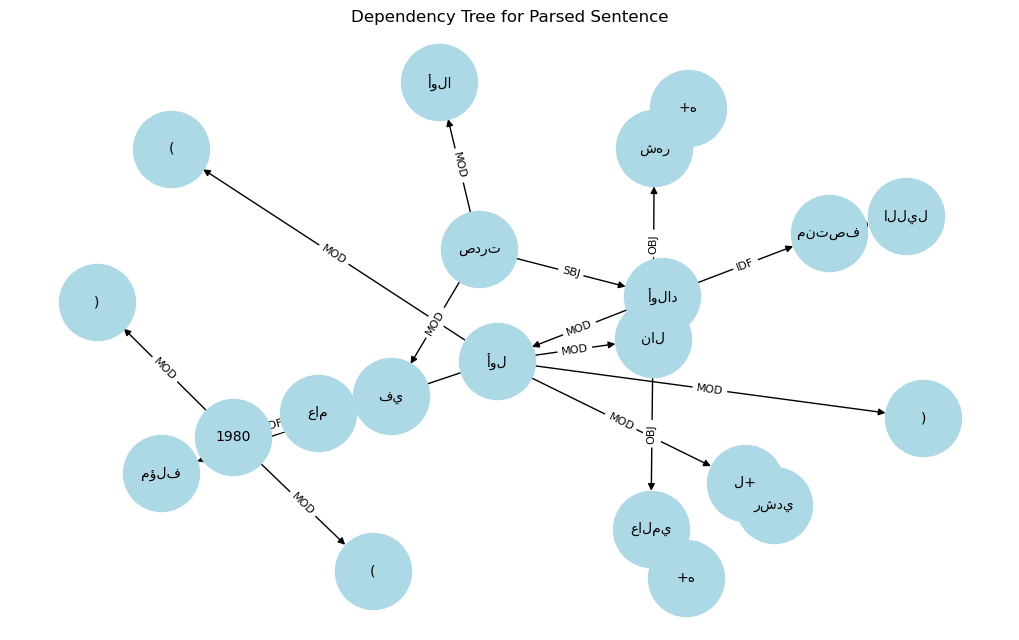

In [13]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# CoNLL-X formatted data
conllx_data = """1	أولا	أول	NOM	_	2	MOD
2	صدرت	صدر	VRB	_	0	ROOT
3	أولاد	ولد	NOM	_	2	SBJ
4	منتصف	منتصف	NOM	_	3	IDF
5	الليل	ليل	NOM	_	4	IDF
6	(	(	PNX	_	7	MOD
7	أول	أول	NOM	_	3	MOD
8	مؤلف	مؤلف	NOM	_	7	IDF
9	ل+	ل+	PRT	_	7	MOD
10	رشدي	رشدي	PROP	_	9	OBJ
11	نال	نال	VRB	_	7	MOD
12	شهر	شهر	NOM	_	11	OBJ
13	+ه	+ه	NOM	_	12	IDF
14	عالمي	عالم	NOM	_	11	OBJ
15	+ه	+ه	NOM	_	14	IDF
16	)	)	PNX	_	7	MOD
17	في	في	PRT	_	2	MOD
18	عام	عام	NOM	_	17	OBJ
19	(	(	PNX	_	20	MOD
20	1980	1980	NOM	_	18	IDF
21	)	)	PNX	_	20	MOD"""

# Convert to DataFrame
data = [line.split("\t") for line in conllx_data.split("\n")]
df = pd.DataFrame(data, columns=["ID", "Word", "Lemma", "POS", "_", "Head", "DepRel"])
df = df.astype({"ID": int, "Head": int})  # Convert IDs to integers

# Build dependency graph
G = nx.DiGraph()
for _, row in df.iterrows():
    G.add_node(row["ID"], word=row["Word"], pos=row["POS"])
    if row["Head"] != 0:  # Ignore ROOT (head=0)
        G.add_edge(row["Head"], row["ID"], dep_rel=row["DepRel"])

# Plot the dependency tree
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)  # Auto-layout for better visualization
labels = {node: G.nodes[node]["word"] for node in G.nodes()}
edge_labels = {(u, v): G[u][v]["dep_rel"] for u, v in G.edges()}

nx.draw(G, pos, with_labels=True, labels=labels, node_size=3000, node_color="lightblue", font_size=10, font_family="Arial")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("Dependency Tree for Parsed Sentence")
plt.show()


# Path representation creation 

In [4]:
import pandas as pd
holo=pd.read_csv("./parse_out/holonoym_paths.csv")
mero=pd.read_csv("./parse_out/meronyms_paths_.csv")
anto=pd.read_csv("./parse_out/antonyms_paths.csv")
syno=pd.read_csv("./parse_out/synonym_paths.csv")
hyper=pd.read_csv("./parse_out/hypernyms_paths.csv")
attr=pd.read_csv("./parse_out/atributes_paths.csv")

In [30]:
holo['relation']='holonym'
mero['relation']='meronym'
syno['relation']='synonym'
hyper['relation']='hypernym'
attr['relation']='attrib'
anto['relation']='antonym'

In [31]:
all_paths=pd.concat([attr,holo,mero,anto,hyper,syno],axis=0)
all_paths

,word1,word2,pos1,pos2,dep_path,relation
0,شاب,عمر,NOM,NOM,"[('الشاب', 'NOM', 'OBJ'), ('ل+', 'PRT', 'MOD')...",attrib
1,عمر,جديد,NOM,NOM,"[('عمر', 'NOM', 'IDF'), ('جديد', 'NOM', 'MOD')]",attrib
2,بعيد,مسافة,NOM,NOM,"[('بعيدة', 'NOM', 'OBJ'), ('مسافة', 'NOM', 'MO...",attrib
3,بعيد,بعد,NOM,NOM,"[('بعيدان', 'NOM', 'PRD'), ('كل', 'NOM', 'IDF'...",attrib
4,حجم,كبير,NOM,NOM,"[('الحجم', 'NOM', 'IDF'), ('الكبير', 'NOM', 'M...",attrib
...,...,...,...,...,...,...
36,أشار,صرح,VRB,NOM,"[('أشار', 'VRB', '---'), ('إلى', 'PRT', 'MOD')...",hypernym
0,ٱنطلق,ذهب,VRB,VRB,"[('انطلقنا', 'VRB', 'OBJ'), ('ف+', 'PRT', 'MOD...",synonym
1,أكد,ساعد,VRB,VRB,"[('أكدت', 'VRB', '---'), ('أن', 'PRT', 'OBJ'),...",synonym
2,أكد,ساعد,VRB,VRB,"[('أكدت', 'VRB', '---'), ('أن', 'PRT', 'OBJ'),...",synonym


In [39]:
print(all_paths.iloc[76]['dep_path'])

[('أراضي', 'NOM', 'MOD'), ('و+', 'PRT', 'MOD'), ('NOAN', 'PROP', 'OBJ'), ('أرمينيا', 'PROP', 'MOD'), ('أفغانستان', 'PROP', 'MOD'), ('إقليم', 'NOM', 'MOD')]


In [32]:
import ast
# Function to extract dependency path, POS tag set, and dependency relation set
pos_tags_set=set()
dep_tags_set=set()
def extract_dep_path_info(dep_path):
    #print(dep_path)
    dep_sequence = [dep[2] for dep in dep_path]
    pos_sequence = [dep[1] for dep in dep_path]       # Extract dependency sequence
# Extract dependency sequence
    pos_tags = {dep[1] for dep in dep_path}
    pos_tags_set.update(pos_tags)# Extract POS tags (use set for uniqueness)
    dep_relations = {dep[2] for dep in dep_path}
    dep_tags_set.update(dep_relations)# Extract POS tags (use set for uniqueness)
# Extract dependency relations (set for uniqueness)
    
    return dep_sequence,pos_sequence, #pos_tags, dep_relations
def convert_str_to_tuple_list(cell):
    return ast.literal_eval(cell)

# Apply the conversion function to each cell in the 'dep_path' column
all_paths['dep_path'] = all_paths['dep_path'].apply(convert_str_to_tuple_list)
df=pd.DataFrame()
# Reset index to avoid duplicate index issue
all_paths_reset = all_paths.reset_index(drop=True)

# Apply function to extract sequences
all_paths['dep_sequence'], all_paths['pos_sequence'] = zip(*all_paths['dep_path'].apply(extract_dep_path_info))

# Now assign the 'relation' column from the reset DataFrame
#df['relation'] = all_paths_reset['relation']
# Show result
all_paths

,word1,word2,pos1,pos2,dep_path,relation,dep_sequence,pos_sequence
0,شاب,عمر,NOM,NOM,"[(الشاب, NOM, OBJ), (ل+, PRT, MOD), (رفيق, NOM...",attrib,"[OBJ, MOD, OBJ, IDF]","[NOM, PRT, NOM, NOM]"
1,عمر,جديد,NOM,NOM,"[(عمر, NOM, IDF), (جديد, NOM, MOD)]",attrib,"[IDF, MOD]","[NOM, NOM]"
2,بعيد,مسافة,NOM,NOM,"[(بعيدة, NOM, OBJ), (مسافة, NOM, MOD)]",attrib,"[OBJ, MOD]","[NOM, NOM]"
3,بعيد,بعد,NOM,NOM,"[(بعيدان, NOM, PRD), (كل, NOM, IDF), (البعد, N...",attrib,"[PRD, IDF, IDF]","[NOM, NOM, NOM]"
4,حجم,كبير,NOM,NOM,"[(الحجم, NOM, IDF), (الكبير, NOM, MOD)]",attrib,"[IDF, MOD]","[NOM, NOM]"
...,...,...,...,...,...,...,...,...
36,أشار,صرح,VRB,NOM,"[(أشار, VRB, ---), (إلى, PRT, MOD), (أن, PRT, ...",hypernym,"[---, MOD, OBJ, SBJ, IDF]","[VRB, PRT, PRT, NOM, NOM]"
0,ٱنطلق,ذهب,VRB,VRB,"[(انطلقنا, VRB, OBJ), (ف+, PRT, MOD), (نزعنا, ...",synonym,"[OBJ, MOD, OBJ, MOD, OBJ, MOD, OBJ, SBJ, MOD, ...","[VRB, PRT, VRB, NOM, VRB, PRT, VRB, NOM, PRT, ..."
1,أكد,ساعد,VRB,VRB,"[(أكدت, VRB, ---), (أن, PRT, OBJ), (يساعد, VRB...",synonym,"[---, OBJ, PRD]","[VRB, PRT, VRB]"
2,أكد,ساعد,VRB,VRB,"[(أكدت, VRB, ---), (أن, PRT, OBJ), (يعتبر, VRB...",synonym,"[---, OBJ, PRD, MOD, IDF, MOD, MOD, OBJ, MOD]","[VRB, PRT, VRB-PASS, NOM, NOM, VRB, PRT, NOM, ..."


In [9]:
pos_tags_set

{'', 'NOM', 'PROP', 'PRT', 'VRB', 'VRB-PASS'}

In [10]:
dep_tags_set

{'---', 'IDF', 'MOD', 'OBJ', 'PRD', 'SBJ', 'TPC'}

In [33]:
import torch
from torch.nn.utils.rnn import pad_sequence
from torch.nn.functional import pad
pos_data = all_paths['pos_sequence'].tolist()        # Store POS sequences in pos_data
dep_data = all_paths['dep_sequence'].tolist() 
# Define a mapping of POS tags to integers
pos_tag_to_idx = {
    '': 0,  # Empty tag could be mapped to 0 or a custom value.
    'NOM': 1,
    'PROP': 2,
    'PRT': 3,
    'VRB': 4,
    'VRB-PASS': 5
}

# Convert filtered_pos_data into a list of index sequences
indexed_pos_data = [[pos_tag_to_idx[pos] for pos in pos_seq] for pos_seq in pos_data]

# Convert the sequences into PyTorch tensors
# Padding sequences to have the same length
padded_pos_data = pad_sequence([torch.tensor(seq) for seq in indexed_pos_data], batch_first=True, padding_value=0)

# Now padded_pos_data is a tensor where each row is a padded sequence
print(padded_pos_data)

# Define a mapping of dependency tags to integers
dep_tag_to_idx = {
    '---': 0,  # Unknown or empty relation could be mapped to 0
    'IDF': 1,
    'MOD': 2,
    'OBJ': 3,
    'PRD': 4,
    'SBJ': 5,
    'TPC': 6
}

# Convert filtered_dep_data into a list of index sequences
indexed_dep_data = [[dep_tag_to_idx[dep] for dep in dep_seq] for dep_seq in dep_data]

# Convert the sequences into PyTorch tensors
# Padding sequences to have the same length
padded_dep_data = pad_sequence([torch.tensor(seq) for seq in indexed_dep_data], batch_first=True, padding_value=0)

# Now padded_dep_data is a tensor where each row is a padded sequence
print(padded_dep_data)


tensor([[1, 3, 1,  ..., 0, 0, 0],
        [1, 1, 0,  ..., 0, 0, 0],
        [1, 1, 0,  ..., 0, 0, 0],
        ...,
        [4, 3, 4,  ..., 0, 0, 0],
        [4, 3, 5,  ..., 0, 0, 0],
        [4, 1, 1,  ..., 0, 0, 0]])
tensor([[3, 2, 3,  ..., 0, 0, 0],
        [1, 2, 0,  ..., 0, 0, 0],
        [3, 2, 0,  ..., 0, 0, 0],
        ...,
        [0, 3, 4,  ..., 0, 0, 0],
        [0, 3, 4,  ..., 0, 0, 0],
        [0, 3, 1,  ..., 0, 0, 0]])


In [34]:
###########Mo3
import torch.optim as optim  # Import PyTorch optimizers
import torch.nn as nn
class DependencyPathEncoder(nn.Module):
    def __init__(self, pos_vocab_size, dep_rel_vocab_size, embedding_dim, hidden_dim):
        super(DependencyPathEncoder, self).__init__()

        # POS and Dependency relation embeddings
        self.pos_embedding = nn.Embedding(pos_vocab_size, embedding_dim)
        self.dep_rel_embedding = nn.Embedding(dep_rel_vocab_size, embedding_dim)

        # BiLSTM encoder
        self.lstm = nn.LSTM(input_size=embedding_dim * 2,
                            hidden_size=hidden_dim,
                            num_layers=1,
                            batch_first=True,
                            bidirectional=True)  

    def forward(self, pos_seq, dep_rel_seq):
        # Convert indices into embeddings
        pos_embedded = self.pos_embedding(pos_seq) 
        dep_rel_embedded = self.dep_rel_embedding(dep_rel_seq) 

        # Concatenate embeddings
        lstm_input = torch.cat((pos_embedded, dep_rel_embedded), dim=2)

        # Pass through BiLSTM
        lstm_output, (h_n, c_n) = self.lstm(lstm_input)

        # Extract final hidden state of both directions
        final_hidden_state = torch.cat((h_n[-2], h_n[-1]), dim=1) 

        return final_hidden_state  # (batch_size, hidden_dim * 2)
# Example vocabulary sizes
pos_vocab_size = 6       # Number of unique POS tags
dep_rel_vocab_size = 7   # Number of unique dependency relations
embedding_dim = 200       # Embedding size for POS and dependency relations
hidden_dim = 100          # LSTM hidden state size
batch_size = 4           # Training batch size
num_epochs = 10        # Training epochs
learning_rate = 0.001     # Learning rate

# Instantiate the model
path_encoder = DependencyPathEncoder(pos_vocab_size, dep_rel_vocab_size, embedding_dim, hidden_dim)
optimizer = optim.Adam(path_encoder.parameters(), lr=learning_rate)
loss_function = nn.TripletMarginLoss(margin=1.0, p=2)  # Triplet loss for similarity learning

# Generate synthetic dataset (simulated POS & dependency sequences)
def generate_fake_data(num_samples, seq_length, pos_vocab_size, dep_rel_vocab_size):
    pos_data = torch.randint(0, pos_vocab_size, (num_samples, seq_length))
    dep_rel_data = torch.randint(0, dep_rel_vocab_size, (num_samples, seq_length))
    return pos_data, dep_rel_data


# Convert dataset into PyTorch DataLoader
max_dep_rel_length = max(len(seq) for seq in dep_data)  # Maximum length in dep_rel_data
# Create training data
num_samples = len(dep_data)  # Number of training samples
seq_length = max_dep_rel_length
from torch.utils.data import TensorDataset, DataLoader

dataset = TensorDataset(padded_pos_data, padded_dep_data)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)


In [13]:
padded_dep_data[0]

tensor([3, 2, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [35]:
# Training loop
for epoch in range(num_epochs):
    path_encoder.train()
    total_loss = 0

    for batch in train_loader:
        pos_batch, dep_rel_batch = batch  # Extract batch data

        # Forward pass: Get dependency path embeddings
        path_embeddings = path_encoder(pos_batch, dep_rel_batch)

        # Simulate positive and negative samples for contrastive learning
        pos_samples = path_embeddings
        neg_samples = torch.roll(path_embeddings, shifts=1, dims=0)  # Shift embeddings as "negative" examples
        anchor_samples = path_embeddings  # Self as anchor

        # Compute triplet loss
        loss = loss_function(anchor_samples, pos_samples, neg_samples)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # Print loss per epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss / len(train_loader):.4f}")

print("Training complete!")


Epoch 1/10, Loss: 0.0585
Epoch 2/10, Loss: 0.0535
Epoch 3/10, Loss: 0.0537
Epoch 4/10, Loss: 0.0549
Epoch 5/10, Loss: 0.0513
Epoch 6/10, Loss: 0.0541
Epoch 7/10, Loss: 0.0542
Epoch 8/10, Loss: 0.0536
Epoch 9/10, Loss: 0.0540
Epoch 10/10, Loss: 0.0547
Training complete!


In [36]:
# Set model to evaluation mode
path_encoder.eval()

# Initialize a list to store the extracted embeddings
extracted_embeddings = []

with torch.no_grad():  # No gradient computation in evaluation phase
    for batch in train_loader:
        pos_batch, dep_rel_batch = batch  # Extract test data

        # Forward pass: Get path embeddings from the model
        path_embeddings = path_encoder(pos_batch, dep_rel_batch)

        # You can store the embeddings for later use
        extracted_embeddings.append(path_embeddings)

# Convert the list of embeddings to a single tensor if needed
extracted_embeddings_tensor = torch.cat(extracted_embeddings, dim=0)

# Now extracted_embeddings_tensor contains all the embeddings
print(extracted_embeddings_tensor.shape)  # Check the shape of the tensor


torch.Size([218, 200])


In [37]:
extracted_embeddings

[tensor([[ 6.9542e-01,  2.5082e-04, -2.4687e-04, -2.0553e-03,  2.1837e-01,
           5.4576e-01,  4.3697e-03,  9.5148e-01,  9.9574e-01,  4.5614e-03,
          -9.9380e-01,  1.8831e-04,  8.3867e-04, -3.1179e-03,  1.2051e-02,
           1.4271e-02,  1.2146e-03, -9.9666e-01,  9.9741e-01,  4.1227e-02,
           8.1831e-01,  9.8543e-01, -6.8467e-01,  3.7795e-01,  9.9264e-01,
          -8.3751e-03,  9.9480e-01, -2.0286e-03, -9.9364e-01,  6.8167e-04,
           9.2970e-01,  7.0182e-01,  2.4722e-04, -9.9895e-01,  7.5234e-01,
          -9.9702e-01,  1.4304e-03,  1.1426e-03, -9.9849e-01, -9.9571e-01,
           4.0091e-03, -5.1146e-04,  5.4840e-05,  5.6680e-01,  3.6614e-02,
          -9.9959e-01,  8.2176e-01, -9.9122e-01,  9.9528e-01,  8.0760e-01,
          -4.2837e-04, -9.5199e-01, -8.5619e-01, -2.4391e-04,  6.0523e-04,
          -4.8412e-01, -1.1430e-02, -9.9705e-01, -9.9031e-01, -8.8239e-05,
          -1.8699e-02, -6.5925e-03,  6.2504e-04,  8.8194e-01,  8.8522e-01,
          -8.2294e-03,  9

In [38]:
all_paths['embedding'] = extracted_embeddings_tensor.tolist()

In [39]:
all_paths

,word1,word2,pos1,pos2,dep_path,relation,dep_sequence,pos_sequence,embedding
0,شاب,عمر,NOM,NOM,"[(الشاب, NOM, OBJ), (ل+, PRT, MOD), (رفيق, NOM...",attrib,"[OBJ, MOD, OBJ, IDF]","[NOM, PRT, NOM, NOM]","[0.6954246163368225, 0.00025082414504140615, -..."
1,عمر,جديد,NOM,NOM,"[(عمر, NOM, IDF), (جديد, NOM, MOD)]",attrib,"[IDF, MOD]","[NOM, NOM]","[0.6901795864105225, 0.0002532736980356276, -0..."
2,بعيد,مسافة,NOM,NOM,"[(بعيدة, NOM, OBJ), (مسافة, NOM, MOD)]",attrib,"[OBJ, MOD]","[NOM, NOM]","[0.6872671842575073, 0.00026886907289735973, -..."
3,بعيد,بعد,NOM,NOM,"[(بعيدان, NOM, PRD), (كل, NOM, IDF), (البعد, N...",attrib,"[PRD, IDF, IDF]","[NOM, NOM, NOM]","[0.6947433948516846, 0.00024893865338526666, -..."
4,حجم,كبير,NOM,NOM,"[(الحجم, NOM, IDF), (الكبير, NOM, MOD)]",attrib,"[IDF, MOD]","[NOM, NOM]","[0.6901795864105225, 0.0002532736980356276, -0..."
...,...,...,...,...,...,...,...,...,...
36,أشار,صرح,VRB,NOM,"[(أشار, VRB, ---), (إلى, PRT, MOD), (أن, PRT, ...",hypernym,"[---, MOD, OBJ, SBJ, IDF]","[VRB, PRT, PRT, NOM, NOM]","[0.6932331323623657, 0.0002501700655557215, -0..."
0,ٱنطلق,ذهب,VRB,VRB,"[(انطلقنا, VRB, OBJ), (ف+, PRT, MOD), (نزعنا, ...",synonym,"[OBJ, MOD, OBJ, MOD, OBJ, MOD, OBJ, SBJ, MOD, ...","[VRB, PRT, VRB, NOM, VRB, PRT, VRB, NOM, PRT, ...","[0.6883021593093872, 0.0002859534870367497, -0..."
1,أكد,ساعد,VRB,VRB,"[(أكدت, VRB, ---), (أن, PRT, OBJ), (يساعد, VRB...",synonym,"[---, OBJ, PRD]","[VRB, PRT, VRB]","[0.6739649772644043, 0.000291497417492792, -0...."
2,أكد,ساعد,VRB,VRB,"[(أكدت, VRB, ---), (أن, PRT, OBJ), (يعتبر, VRB...",synonym,"[---, OBJ, PRD, MOD, IDF, MOD, MOD, OBJ, MOD]","[VRB, PRT, VRB-PASS, NOM, NOM, VRB, PRT, NOM, ...","[0.6937204003334045, 0.00020158108964096755, -..."


In [ ]:
######GPT4
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Define the Dependency Path Encoder
class DependencyPathEncoder(nn.Module):
    def __init__(self, pos_vocab_size, dep_rel_vocab_size, embedding_dim, hidden_dim):
        super(DependencyPathEncoder, self).__init__()

        # POS tag embeddings
        self.pos_embedding = nn.Embedding(pos_vocab_size, embedding_dim)
        # Dependency relation embeddings
        self.dep_rel_embedding = nn.Embedding(dep_rel_vocab_size, embedding_dim)

        # BiLSTM encoder
        self.lstm = nn.LSTM(input_size=embedding_dim * 2,  # POS + dep relation
                            hidden_size=hidden_dim,
                            num_layers=1,
                            batch_first=True,
                            bidirectional=True)  # BiLSTM for richer representations

    def forward(self, pos_seq, dep_rel_seq):
        """
        :param pos_seq: Tensor of POS tag indices (batch_size, seq_length)
        :param dep_rel_seq: Tensor of dependency relation indices (batch_size, seq_length)
        :return: Dependency path embedding (batch_size, hidden_dim * 2)
        """

        # Convert indices into embeddings
        pos_embedded = self.pos_embedding(pos_seq)  # (batch_size, seq_length, embedding_dim)
        dep_rel_embedded = self.dep_rel_embedding(dep_rel_seq)  # (batch_size, seq_length, embedding_dim)

        # Concatenate POS and dependency relation embeddings
        lstm_input = torch.cat((pos_embedded, dep_rel_embedded), dim=2)  # (batch_size, seq_length, embedding_dim * 2)

        # Pass through BiLSTM
        lstm_output, (h_n, c_n) = self.lstm(lstm_input)  # h_n: (num_layers * 2, batch_size, hidden_dim)

        # Extract the final hidden state of both directions
        final_hidden_state = torch.cat((h_n[-2], h_n[-1]), dim=1)  # (batch_size, hidden_dim * 2)

        return final_hidden_state  # This is the dependency path embedding

# Define training parameters
pos_vocab_size = 50       # Assume 50 unique POS tags
dep_rel_vocab_size = 40   # Assume 40 unique dependency relations
embedding_dim = 128       # Embedding size for POS and dependency relation
hidden_dim = 256          # LSTM hidden state size
batch_size = 32           # Number of samples per batch
num_epochs = 10           # Training epochs
learning_rate = 0.001     # Optimizer learning rate

# Instantiate the model
model = DependencyPathEncoder(pos_vocab_size, dep_rel_vocab_size, embedding_dim, hidden_dim)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Define contrastive loss function (Triplet loss, for similarity learning)
loss_function = nn.TripletMarginLoss(margin=1.0, p=2)

# Generate synthetic dataset (simulated POS & dependency sequences)
def generate_fake_data(num_samples, seq_length, pos_vocab_size, dep_rel_vocab_size):
    pos_data = torch.randint(0, pos_vocab_size, (num_samples, seq_length))
    dep_rel_data = torch.randint(0, dep_rel_vocab_size, (num_samples, seq_length))
    return pos_data, dep_rel_data

# Create training data
num_samples = 1000  # Number of training samples
seq_length = 5  # Maximum dependency path length
pos_data, dep_rel_data = generate_fake_data(num_samples, seq_length, pos_vocab_size, dep_rel_vocab_size)

# Convert dataset into PyTorch DataLoader
from torch.utils.data import TensorDataset, DataLoader

dataset = TensorDataset(pos_data, dep_rel_data)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Training loop
for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for batch in train_loader:
        pos_batch, dep_rel_batch = batch  # Extract batch data

        # Forward pass: Get dependency path embeddings
        path_embeddings = model(pos_batch, dep_rel_batch)

        # Simulate positive and negative samples for contrastive learning
        pos_samples = path_embeddings
        neg_samples = torch.roll(path_embeddings, shifts=1, dims=0)  # Shift embeddings as "negative" examples
        anchor_samples = path_embeddings  # Self as anchor

        # Compute triplet loss
        loss = loss_function(anchor_samples, pos_samples, neg_samples)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # Print loss per epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss / len(train_loader):.4f}")

print("Training complete!")

# Save the trained model
torch.save(model.state_dict(), "dependency_path_encoder.pth")

print("Model saved successfully!")


In [ ]:
# Generate and save embeddings for known paths
path_embeddings = {}

for i in range(100):  # Assume we have 100 different paths
    pos_seq, dep_rel_seq = generate_fake_data(1, seq_length, pos_vocab_size, dep_rel_vocab_size)
    path_embedding = path_encoder(pos_seq, dep_rel_seq).detach()  # Get path embedding
    path_embeddings[f"path_{i}"] = path_embedding.squeeze(0)  # Store in dictionary

# Save to file
torch.save(path_embeddings, "dependency_path_embeddings.pth")
print("Dependency Path Embeddings saved successfully!")


In [69]:
# Example dependency path (batch_size=1, seq_length=4)
pos_example = padded_pos_data[0][0]  # POS tag indices
dep_rel_example = padded_dep_data[0][0]  # Dependency relation indices

# Get dependency path embedding
path_embedding = path_encoder(pos_example, dep_rel_example)

print("Dependency Path Embedding Shape:", path_embedding.shape)  # Expected: (batch_size, hidden_dim * 2)


IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 2)

In [71]:
padded_pos_data[0]

tensor([1, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [72]:
padded_dep_data[0]

tensor([3, 2, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## visulize resulted paths

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7c6e6b90b1a0>
Traceback (most recent call last):
  File "/home/randah/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/randah/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/randah/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/randah/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attr

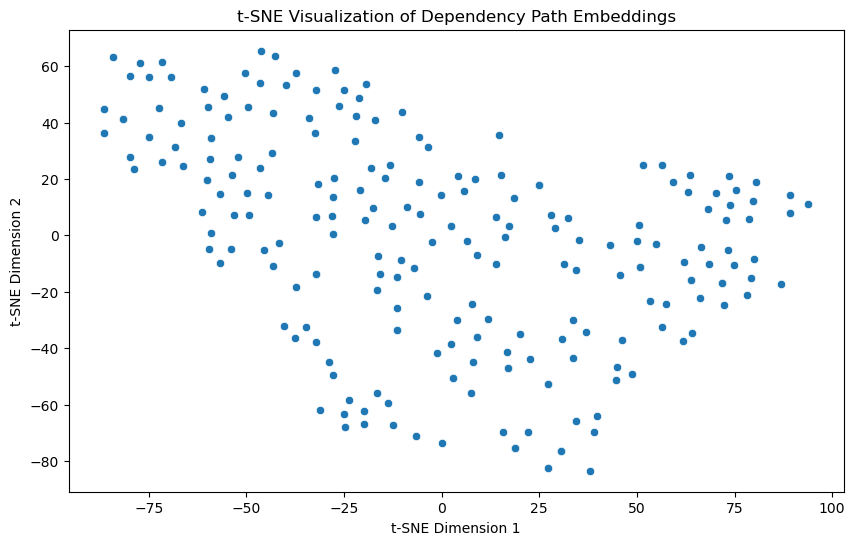

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import numpy as np

# Generate embeddings for a sample of dependency paths
num_samples = 100
pos_sample, dep_rel_sample = padded_pos_data,padded_dep_data

# Get embeddings
path_encoder.eval()
with torch.no_grad():
    embeddings = path_encoder(pos_sample, dep_rel_sample).cpu().numpy()

# Apply t-SNE for dimensionality reduction (2D projection)
tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings = tsne.fit_transform(embeddings)

# Plot the embeddings
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_embeddings[:, 0], y=reduced_embeddings[:, 1])
plt.title("t-SNE Visualization of Dependency Path Embeddings")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7c6e2ace49a0>
Traceback (most recent call last):
  File "/home/randah/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/randah/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/randah/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/randah/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attr

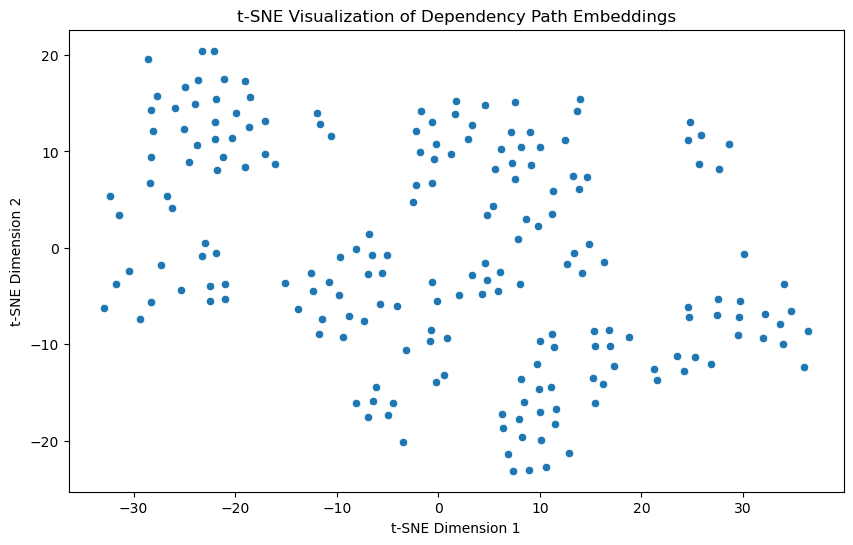

In [424]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import numpy as np

# Generate embeddings for a sample of dependency paths
num_samples = 100
pos_sample, dep_rel_sample = padded_pos_data,padded_dep_data

# Get embeddings
path_encoder.eval()
with torch.no_grad():
    embeddings = path_encoder(pos_sample, dep_rel_sample).cpu().numpy()

# Apply t-SNE for dimensionality reduction (2D projection)
tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings = tsne.fit_transform(embeddings)

# Plot the embeddings
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_embeddings[:, 0], y=reduced_embeddings[:, 1])
plt.title("t-SNE Visualization of Dependency Path Embeddings")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7c6e6086ad40>
Traceback (most recent call last):
  File "/home/randah/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/randah/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/randah/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/randah/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attr

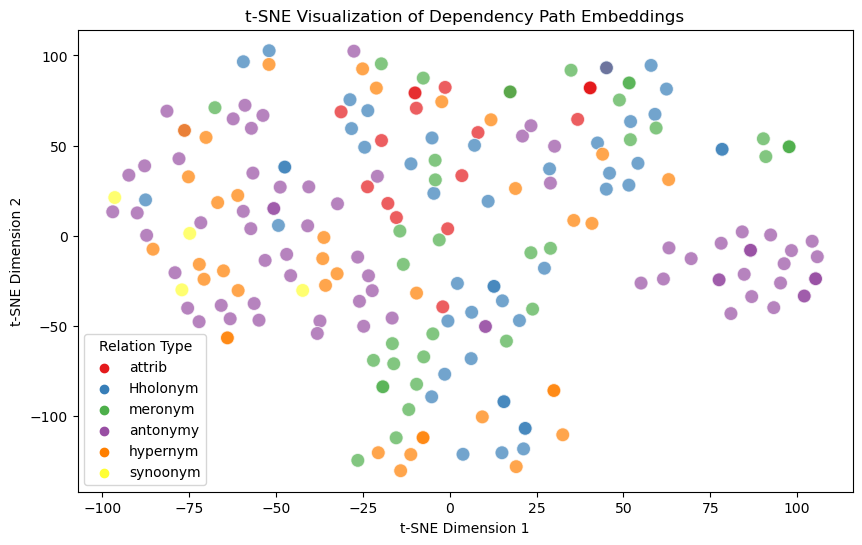

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import numpy as np

# Generate embeddings for a sample of dependency paths
num_samples = 100
pos_sample, dep_rel_sample = padded_pos_data, padded_dep_data
rel_type = df['relation'].tolist()  # Your list of relations, make sure it's the same length as your data

# Get embeddings
path_encoder.eval()
with torch.no_grad():
    embeddings = path_encoder(pos_sample, dep_rel_sample).cpu().numpy()

# Apply t-SNE for dimensionality reduction (2D projection)
tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings = tsne.fit_transform(embeddings)

# Create a DataFrame for the scatter plot, including embeddings and relation types
import pandas as pd
df1 = pd.DataFrame(reduced_embeddings, columns=["Dim1", "Dim2"])
df1['Relation'] = rel_type  # Add relation types to the DataFrame

# Plot the embeddings with different colors based on the relation type
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Dim1", y="Dim2", hue="Relation", palette="Set1", data=df1, s=100, alpha=0.7)

# Customize plot
plt.title("t-SNE Visualization of Dependency Path Embeddings")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Relation Type")
plt.show()


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7087068e9ee0>
Traceback (most recent call last):
  File "/home/randah/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/randah/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/randah/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/randah/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attr

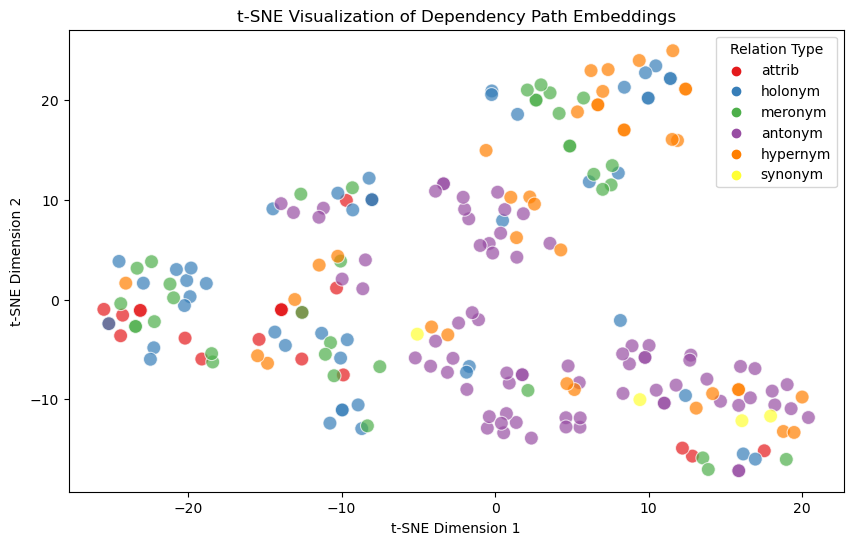

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import numpy as np

# Generate embeddings for a sample of dependency paths
num_samples = 100
pos_sample, dep_rel_sample = padded_pos_data, padded_dep_data
rel_type = all_paths['relation'].tolist()  # Your list of relations, make sure it's the same length as your data

# Get embeddings
'''path_encoder.eval()
with torch.no_grad():
    embeddings = path_encoder(pos_sample, dep_rel_sample).cpu().numpy()'''
embeddings=torch.tensor(all_paths['embedding'].tolist())
# Apply t-SNE for dimensionality reduction (2D projection)
tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings = tsne.fit_transform(embeddings)

# Create a DataFrame for the scatter plot, including embeddings and relation types
import pandas as pd
df1 = pd.DataFrame(reduced_embeddings, columns=["Dim1", "Dim2"])
df1['Relation'] = rel_type  # Add relation types to the DataFrame

# Plot the embeddings with different colors based on the relation type
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Dim1", y="Dim2", hue="Relation", palette="Set1", data=df1, s=100, alpha=0.7)

# Customize plot
plt.title("t-SNE Visualization of Dependency Path Embeddings")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Relation Type")
plt.show()

# Missing path predection 

## Load embeddings

In [40]:
holo1=pd.read_csv("./text_pair/holonyms_pairs_lemma.csv",names=["word1", "word2"])
mero1=pd.read_csv("./text_pair/meronyms_pairs_lemma.csv",names=["word1", "word2"])
anto1=pd.read_csv("./text_pair/antonyms_pairs_lemma.csv",names=["word1", "word2"])
syno1=pd.read_csv("./text_pair/synonyms_pairs_lemma.csv",names=["word1", "word2"])
hyper1=pd.read_csv("./text_pair/hypernyms_pairs_lemma.csv",names=["word1", "word2"])
attr1=pd.read_csv("./text_pair/attributes_pairs_lemma.csv",names=["word1", "word2"])

In [132]:
holo1

,word1,word2
0,عرف,دجاجيات
1,فيينا,نمسا
2,إيرلندا,إرلندا
3,بروكسل,بلجيكا
4,زامبيا,أفريقيا
...,...,...
538,حل,فخار
539,حل,فخاريات
540,ورق,صفحة
541,يود,مالح


In [41]:
holo1 = holo1[holo1['word1'] != holo1['word2']]
mero1 = mero1[mero1['word1'] != mero1['word2']]
anto1 = anto1[anto1['word1'] != anto1['word2']]
syno1 = syno1[syno1['word1'] != syno1['word2']]
hyper1 = hyper1[hyper1['word1'] != hyper1['word2']]
attr1 = attr1[attr1['word1'] != attr1['word2']]

In [44]:
holo1['relation']='holonym'
mero1['relation']='meronym'
syno1['relation']='synonym'
hyper1['relation']='hypernym'
attr1['relation']='attrib'
anto1['relation']='antonym'


In [45]:
common_records = pd.merge(holo1, holo, on=['word1', 'word2'])
holo2 = holo1[~holo1.isin(common_records)].dropna()
common_records = pd.merge(mero1, mero, on=['word1', 'word2'])
mero2 = mero1[~mero1.isin(common_records)].dropna()
common_records = pd.merge(syno1, syno, on=['word1', 'word2'])
syno2 = syno1[~syno1.isin(common_records)].dropna()
common_records = pd.merge(anto1, anto, on=['word1', 'word2'])
anto2 = anto1[~anto1.isin(common_records)].dropna()
common_records = pd.merge(hyper1, hyper, on=['word1', 'word2'])
hyper2 = hyper1[~hyper1.isin(common_records)].dropna()
ommon_records = pd.merge(attr1, attr, on=['word1', 'word2'])
attr2 = attr1[~attr1.isin(common_records)].dropna()



In [46]:
all_paths2=pd.concat([holo2,mero2,syno2,anto2,hyper2,attr2])

In [155]:
# Group by 'relation' and aggregate the embeddings into lists
embedding_dict = all_paths.groupby('relation')['embedding'].apply(list).to_dict()

# Check the result
for relation, embeddings in embedding_dict.items():
    print(f"{relation}: {len(embeddings)} embeddings")

# Convert the lists of embeddings in the dictionary to tensors
for relation, embeddings in embedding_dict.items():
    # Convert the list of embeddings for each relation to a tensor
    embedding_dict[relation] = torch.tensor(embeddings)

Hholonym: 46 embeddings
antonymy: 74 embeddings
attrib: 21 embeddings
hypernym: 37 embeddings
meronym: 36 embeddings
synoonym: 4 embeddings


In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Load GloVe embeddings (assuming 300D vectors)
def load_glove_model(glove_file_path):
    """Loads GloVe embeddings from a text file."""
    word_to_index = {}
    embeddings = []
    with open(glove_file_path, 'r', encoding='utf-8') as f:
        for index, line in enumerate(f):
            values = line.split()
            print(values)
            word = values[0]
            coefs = np.asarray(values[2], dtype='float32')
            word_to_index[word] = index
            embeddings.append(coefs)
    return word_to_index, np.array(embeddings)

glove_file_path = 'LEAR_ASRD_5iter_full_glove100d.txt'#'/home/randah/PycharmProjects/models/glove/geometric_emb/glove_ep50_size100_lr0.05_vocab539642_mix-poincare_OPTmixradagrad_COOCCFUNClog_DISTFUNCdist-sq_NUMEMBS50_E18.txt'  # Update with your GloVe file
def load_lear_model(lear_file_path):
    """Loads GloVe embeddings from a text file."""
    word_to_index = {}
    embeddings = []
    with open(lear_file_path, 'r', encoding='utf-8') as f:
        for index, line in enumerate(f):
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            word_to_index[word] = index
            embeddings.append(coefs)
    return word_to_index, np.array(embeddings)

word_to_index_glove, glove_embeddings = load_lear_model(glove_file_path)
#################################################################################
# Load pre-trained dependency path embeddings


In [274]:
class WordPairEncoder(nn.Module):
    def __init__(self, embedding_dim=100, hidden_dim=200):
        super(WordPairEncoder, self).__init__()
        
        # Linear transformation to map concatenated embeddings to hidden space
        self.fc = nn.Linear(embedding_dim * 2, hidden_dim)
        self.activation = nn.ReLU()

    def forward(self, word1, word2, glove_embeddings):
        """
        Encode a word pair into a dense representation.
        :param word1, word2: Word strings
        :param glove_embeddings: Dictionary of pre-trained embeddings
        """
        # Return the embedding if the word exists, otherwise return a zero tensor
        if word1.strip() in word_to_index_glove.keys():
            #print(glove_embeddings[word_to_index_glove[word1]])
            emb1 = torch.tensor(glove_embeddings[word_to_index_glove[word1.strip()]], dtype=torch.float32,requires_grad=True)
        else:
            emb1 = torch.rand(100, dtype=torch.float32,requires_grad=True)
            #print(word1)# Zero tensor of the same embedding size

        # Return the embedding if the word exists, otherwise return a zero tensor
        if word2.strip() in word_to_index_glove.keys():
            emb2 = torch.tensor(glove_embeddings[word_to_index_glove[word2.strip()]], dtype=torch.float32,requires_grad=True)
        else:
            emb2 = torch.rand(100, dtype=torch.float32,requires_grad=True)
            #print(word2)# Zero tensor of the same embedding size
        #print(emb2.shape)
        #print(emb1.shape)
        # Ensure that emb1 and emb2 are 1-dimensional tensors before concatenating
        if emb1.dim() == 0:
            emb1 = emb1.unsqueeze(0)  # Make sure it's at least 1-dimensional
        if emb2.dim() == 0:
            emb2 = emb2.unsqueeze(0) 
        #print(emb2.shape)
        #print(emb1.shape)
        pair_embedding = torch.cat((emb1, emb2),dim=0) 
        #print(pair_embedding.shape)# Concatenate embeddings
        transformed_embedding = self.activation(self.fc(pair_embedding))
        
        return transformed_embedding  # (hidden_dim,)


In [275]:
def retrive_embedding(word1,word2):
    # Return the embedding if the word exists, otherwise return a zero tensor
        if word1.strip() in word_to_index_glove.keys():
            #print(glove_embeddings[word_to_index_glove[word1]])
            emb1 = torch.tensor(glove_embeddings[word_to_index_glove[word1.strip()]], dtype=torch.float32,requires_grad=True)
        else:
            emb1 = torch.zeros(100, dtype=torch.float32,requires_grad=True)
            #print(word1)# Zero tensor of the same embedding size

        # Return the embedding if the word exists, otherwise return a zero tensor
        if word2.strip() in word_to_index_glove.keys():
            emb2 = torch.tensor(glove_embeddings[word_to_index_glove[word2.strip()]], dtype=torch.float32,requires_grad=True)
        else:
            emb2 = torch.zeros(100, dtype=torch.float32,requires_grad=True)
            #print(word2)# Zero tensor of the same embedding size
        #print(emb2.shape)
        #print(emb1.shape)
        # Ensure that emb1 and emb2 are 1-dimensional tensors before concatenating
        if emb1.dim() == 0:
            emb1 = emb1.unsqueeze(0)  # Make sure it's at least 1-dimensional
        if emb2.dim() == 0:
            emb2 = emb2.unsqueeze(0) 
        #print(emb2.shape)
        #print(emb1.shape)
        pair_embedding = torch.cat((emb1, emb2),dim=0) 
        #print(pair_embedding.shape)# Concatenate embeddings
        #transformed_embedding = self.activation(self.fc(pair_embedding))
        
        return pair_embedding

## The Prototypical Network

### compute prototypes

In [ ]:
mo3

In [290]:
def compute_relation_prototypes(paths_per_relation, path_encoder):
    """
    Compute prototypes dynamically by averaging path embeddings per relation.
    
    :param paths_per_relation: Dictionary {relation: [list of path sequences]}
    :param path_encoder: Pre-trained LSTM encoder for dependency paths
    :return: Dictionary {relation: prototype vector}
    """
    relation_prototypes = {}
    
    for relation, paths in paths_per_relation.items():
        path_embeddings = []
        
        for path in paths:
            path = torch.tensor(path)
            path_embedding = path#path_encoder(pos_seq, dep_rel_seq)
            path_embeddings.append(path_embedding)
        
        # Compute prototype (mean embedding)
        prototype = torch.mean(torch.stack(path_embeddings), dim=0)
        relation_prototypes[relation] = prototype
    
    return relation_prototypes  # Dictionary {relation: prototype vector}


### The network

In [291]:
class PrototypicalNetwork(nn.Module):
    def __init__(self, hidden_dim=200, distance_metric='euclidean'):
        super(PrototypicalNetwork, self).__init__()
        self.distance_metric = distance_metric
        # Linear transformation to map concatenated embeddings to hidden space
        #self.fc = nn.Linear(embedding_dim * 2, hidden_dim)
        #self.activation = nn.ReLU()
    def forward(self, pair_embedding, relation_prototypes):
        """
        Compute distances between word pair embedding and relation prototypes.
        :param pair_embedding: (hidden_dim,)
        :param relation_prototypes: Dictionary {relation: prototype vector}
        :return: Probabilities over relation types
        """
        prototype_vectors = torch.stack(list(relation_prototypes.values()))  # (num_relations, hidden_dim)
        relation_labels = list(relation_prototypes.keys())

        # Compute distances
        if self.distance_metric == 'euclidean':
            distances = torch.norm(pair_embedding - prototype_vectors, dim=1)  
        elif self.distance_metric == 'cosine':
            distances = 1 - torch.nn.functional.cosine_similarity(pair_embedding.unsqueeze(0), prototype_vectors)
        else:
            raise ValueError("Unsupported distance metric")

        # Softmax over negative distances
        relation_probs = torch.nn.functional.log_softmax(-distances, dim=0)  

        return relation_probs, relation_labels



In [294]:
# Instantiate Models
pair_encoder = WordPairEncoder()
proto_net = PrototypicalNetwork(distance_metric ='euclidean')

optimizer = optim.Adam(pair_encoder.parameters(), lr=0.001)
criterion = nn.NLLLoss()#nn.CrossEntropyLoss()

# Example training data (word pairs with observed paths and relations)
train_data = all_paths

# Training Loop
num_epochs = 100
for epoch in range(num_epochs):
    total_loss = 0

    # Compute prototypes dynamically
    paths_per_relation = {}
    for _,row in train_data.iterrows():
        if relation_dict[row['relation']] not in paths_per_relation:
            paths_per_relation[relation_dict[row['relation']]] = []
        paths_per_relation[relation_dict[row['relation']]].append(row['embedding'])

    relation_prototypes = compute_relation_prototypes(paths_per_relation, path_encoder)

    for _,row in train_data.iterrows():
        word1=row['word1']
        word2=row['word2']
        true_relation=relation_dict[row['relation']]
        optimizer.zero_grad()
        
        # Encode word pair
        pair_embedding = pair_encoder(word1,word2,glove_embeddings)
        
        # Compute relation probabilities
        relation_probs, relation_labels = proto_net(pair_embedding, relation_prototypes)

        # Get target label index
        target_idx = torch.tensor([relation_labels.index(true_relation)], dtype=torch.long)
        #print(torch.argmax(relation_probs.unsqueeze(0), axis=1))
        # Convert probabilities to log-probabilities for NLLLoss
        #log_relation_probs = torch.log(relation_probs.unsqueeze(0))

        loss = criterion(relation_probs.unsqueeze(0),  target_idx)
        #print(target_idx)

        # Backpropagation
        loss.backward()
        optimizer.step()
   # Compute loss
       
        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")

print("Training complete!")


Epoch 1, Loss: 374.7080
Epoch 2, Loss: 345.0793
Epoch 3, Loss: 328.9452
Epoch 4, Loss: 316.7591
Epoch 5, Loss: 306.5554
Epoch 6, Loss: 299.7518
Epoch 7, Loss: 294.7513
Epoch 8, Loss: 290.9096
Epoch 9, Loss: 287.6467
Epoch 10, Loss: 285.0229
Epoch 11, Loss: 282.9304
Epoch 12, Loss: 281.1773
Epoch 13, Loss: 279.6882
Epoch 14, Loss: 278.3455
Epoch 15, Loss: 277.1786
Epoch 16, Loss: 276.2143
Epoch 17, Loss: 275.2605
Epoch 18, Loss: 274.2916
Epoch 19, Loss: 273.3417
Epoch 20, Loss: 272.5532
Epoch 21, Loss: 271.8870
Epoch 22, Loss: 271.2438
Epoch 23, Loss: 270.6789
Epoch 24, Loss: 270.1033
Epoch 25, Loss: 269.7075
Epoch 26, Loss: 268.9851
Epoch 27, Loss: 268.5146
Epoch 28, Loss: 268.1145
Epoch 29, Loss: 267.7773
Epoch 30, Loss: 267.3595
Epoch 31, Loss: 267.0439
Epoch 32, Loss: 266.7762
Epoch 33, Loss: 266.4521
Epoch 34, Loss: 266.1611
Epoch 35, Loss: 265.9062
Epoch 36, Loss: 265.6648
Epoch 37, Loss: 265.4420
Epoch 38, Loss: 265.2065
Epoch 39, Loss: 264.9693
Epoch 40, Loss: 264.7692
Epoch 41,

In [181]:
glove_embeddings[word_to_index_glove[word2.strip()]

-0.5422019

### another model

In [287]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class PrototypicalNetworkWithProjection(nn.Module):
    def __init__(self, word_emb_dim, path_emb_dim, shared_dim, distance_metric='euclidean'):
        super(PrototypicalNetworkWithProjection, self).__init__()

        # Projection layers to map word and path embeddings into a shared space
        self.word_proj = nn.Linear(word_emb_dim, shared_dim)
        self.path_proj = nn.Linear(path_emb_dim, shared_dim)
        self.distance_metric = distance_metric

    def forward(self, word_embedding, path_embedding, relation_prototypes):
        """
        Project word and path embeddings into shared space and compute distances to prototypes.
        :param word_embedding: Tensor of word pair embeddings (batch_size, word_emb_dim)
        :param path_embedding: Tensor of path embeddings (batch_size, path_emb_dim)
        :param relation_prototypes: Dictionary {relation: prototype vector}
        :return: Log probabilities over relation types
        """
        # Project both word and path embeddings into shared space
        word_in_shared_space = F.relu(self.word_proj(word_embedding))  # (batch_size, shared_dim)
        path_in_shared_space = F.relu(self.path_proj(path_embedding))  # (batch_size, shared_dim)

        # Stack relation prototypes into a tensor
        prototype_vectors = torch.stack(list(relation_prototypes.values()))  # (num_relations, shared_dim)
        relation_labels = list(relation_prototypes.keys())

        # Compute distances between word embeddings and each prototype
        if self.distance_metric == 'euclidean':
            distances = torch.norm(word_in_shared_space.unsqueeze(1) - prototype_vectors, dim=2)  # (batch_size, num_relations)
        elif self.distance_metric == 'cosine':
            distances = 1 - F.cosine_similarity(word_in_shared_space.unsqueeze(1), prototype_vectors.unsqueeze(0), dim=2)
        else:
            raise ValueError("Unsupported distance metric")

        # Compute log-softmax over the negative distances (to get probabilities)
        log_relation_probs = F.log_softmax(-distances, dim=1)  # (batch_size, num_relations)

        return log_relation_probs, relation_labels


In [289]:
# Instantiate Models
word_emb_dim = 200  # Example GloVe word embedding size
path_emb_dim = 200  # Example path embedding size
shared_dim = 128    # Common embedding space dimension

proto_net = PrototypicalNetworkWithProjection(word_emb_dim, path_emb_dim, shared_dim)

optimizer = torch.optim.Adam(proto_net.parameters(), lr=0.001)
criterion = nn.NLLLoss()  # Negative Log-Likelihood Loss for classification

# Example training data (word pairs with observed paths and relations)
train_data = all_paths  # Replace with actual data

# Training Loop
num_epochs = 100
for epoch in range(num_epochs):
    total_loss = 0

    # Compute prototypes dynamically
    paths_per_relation = {}
    for _, row in train_data.iterrows():
        if relation_dict[row['relation']] not in paths_per_relation:
            paths_per_relation[relation_dict[row['relation']]] = []
        paths_per_relation[relation_dict[row['relation']]].append(row['embedding'])

    relation_prototypes = compute_relation_prototypes(paths_per_relation, path_encoder)

    for _, row in train_data.iterrows():
        word1 = row['word1']
        word2 = row['word2']
        true_relation = relation_dict[row['relation']]

        optimizer.zero_grad()

        # Encode word pair and path
        word_embedding = pair_encoder(word1, word2, glove_embeddings)  # GloVe word pair embedding
        path_embedding = torch.tensor(row['embedding'])  # Pre-computed path embedding

        # Compute log probabilities over relations
        log_relation_probs, relation_labels = proto_net(word_embedding, path_embedding, relation_prototypes)

        # Get target label index
        target_idx = torch.tensor([relation_labels.index(true_relation)], dtype=torch.long)

        # Compute loss
        loss = criterion(log_relation_probs.unsqueeze(0), target_idx)

        # Backpropagation
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")

print("Training complete!")


RuntimeError: The size of tensor a (128) must match the size of tensor b (6) at non-singleton dimension 0

## Predict missing path

In [307]:
def predict_missing_path(word1, word2):
    pair_embedding = pair_encoder(word1, word2, glove_embeddings)
    relation_probs, relation_labels = proto_net(pair_embedding, relation_prototypes)
    predicted_idx = torch.argmax(relation_probs).item()
    return relation_prototypes[predicted_idx]

print("Predicted relation for ('جميل', 'قبيح'):", predict_missing_path("تفتت", "فطر"))



Predicted relation for ('جميل', 'قبيح'): tensor([-0.1286, -0.0134,  0.9971, -0.0926,  0.6829, -0.0089, -0.9109, -0.9795,
        -0.9835, -0.3073, -0.0325,  0.6433, -0.9354,  0.8233, -0.4143,  0.2635,
         0.0136, -0.0223,  0.9874,  0.9396, -0.3466,  0.5369,  0.9718, -0.8751,
         0.9271, -0.4379,  0.0087,  0.5603,  0.3889, -0.1776,  0.9590,  0.1905,
         0.7576,  0.9228,  0.9668, -0.6368, -0.0258, -0.8822,  0.2635,  0.4210,
         0.0195,  0.5957, -0.9773, -0.6905, -0.6553,  0.9492,  0.9631,  0.1831,
        -0.3867,  0.8642,  0.0035,  0.1100,  0.5347, -0.9505,  0.9775,  0.7377,
         0.9120,  0.9672, -0.9668,  0.0903,  0.3255, -0.1364, -0.3715, -0.5855,
        -0.9216, -0.9242, -0.1381, -0.9569,  0.2490,  0.9799, -0.7752, -0.9642,
         0.9761, -0.1370,  0.2211,  0.8569,  0.2876, -0.9747,  0.0013,  0.9701,
         0.9853, -0.0268, -0.3152, -0.8474,  0.9695, -0.0048,  0.2026, -0.9306,
         0.9849,  0.9587,  0.9142, -0.6691, -0.9888, -0.0647, -0.0075,  0.9749,

## Trying sctich engine

In [9]:
import requests

api_key = 'e5b09a17eb26f36744895064d67871e4'
corpus = 'my_corpus'  # Example Arabic corpus 

hypernym_pairs = [("كلب", "حيوان"), ("تفاحة", "فاكهة")]

for hyponym, hypernym in hypernym_pairs:
    endpoint = 'https://api.sketchengine.eu/search/concordance'
    params = {
        'corpname': corpus,
        'format': 'json',
        'q': f'lc5 {hyponym} rc5',  # 5 words left and right context
        'api_key': api_key
    }

    response = requests.get(endpoint, params=params)

    if response.status_code == 200:
        data = response.json()
        for example in data['Lines']:
            sentence = example['Left'] + example['Kwic'] + example['Right']
            # Extract Arabic patterns using regex or other techniques
            # ... 
    else:
        print(f"Error: {response}")

Error: <Response [404]>
Error: <Response [404]>


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class PrototypicalNetwork(nn.Module):
    def __init__(self, word_emb_dim, path_emb_dim, hidden_dim):
        super(PrototypicalNetwork, self).__init__()
        # Word pair feature extractor
        self.encoder = nn.Sequential(
            nn.Linear(word_emb_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, path_emb_dim)
        )

    def forward(self, support_set, query_set, n_classes, k_shots):
        # Encode support set and query set
        support_embeds = self.encoder(support_set)  # [n_classes * k_shots, path_emb_dim]
        query_embeds = self.encoder(query_set)      # [n_queries, path_emb_dim]

        # Compute class prototypes
        prototypes = []
        for i in range(n_classes):
            class_support = support_embeds[i * k_shots:(i + 1) * k_shots]
            prototypes.append(class_support.mean(dim=0))  # Mean embedding for each class

        prototypes = torch.stack(prototypes)  # [n_classes, path_emb_dim]

        # Compute distances between query embeddings and prototypes
        dists = torch.cdist(query_embeds, prototypes)  # [n_queries, n_classes]

        return dists, prototypes, query_embeds


# chatGPT Edu 

In [29]:
relation_dict={'attrib':1, 'holonym':2, 'meronym':3, 'antonym':4, 'hypernym':5, 'synonym':0}

In [ ]:
import numpy as np

# Load GloVe embeddings (assuming 300D vectors)
def load_glove_model(glove_file_path):
    """Loads GloVe embeddings from a text file."""
    word_to_index = {}
    embeddings = []
    with open(glove_file_path, 'r', encoding='utf-8') as f:
        for index, line in enumerate(f):
            values = line.split()
            print(values)
            word = values[0]
            coefs = np.asarray(values[2], dtype='float32')
            word_to_index[word] = index
            embeddings.append(coefs)
    return word_to_index, np.array(embeddings)

glove_file_path = 'LEAR_ASRD_5iter_full_glove100d.txt'#'/home/randah/PycharmProjects/models/glove/geometric_emb/glove_ep50_size100_lr0.05_vocab539642_mix-poincare_OPTmixradagrad_COOCCFUNClog_DISTFUNCdist-sq_NUMEMBS50_E18.txt'  # Update with your GloVe file
def load_lear_model(lear_file_path):
    """Loads GloVe embeddings from a text file."""
    word_to_index = {}
    embeddings = []
    with open(lear_file_path, 'r', encoding='utf-8') as f:
        for index, line in enumerate(f):
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            word_to_index[word] = index
            embeddings.append(coefs)
    return word_to_index, np.array(embeddings)

word_to_index_glove, glove_embeddings = load_lear_model(glove_file_path)

In [24]:
# Iterate over rows using iterrows()
def get_embedding(word):
    if word.strip() in word_to_index_glove.keys():
            emb2 = np.array(glove_embeddings[word_to_index_glove[word.strip()]])
    else:
            emb2 = np.random.rand(100)
    return emb2
'''data={
     'word1':all_paths['word1'],
    'word2': all_paths['word2'],
    #'word1_embed': all_paths['dep_embed'],
    #'word2_embed': all_paths['dep_embed'],
    'relation': all_paths['relation'],
    'dep_path': all_paths['dep_path'],
    'dep_embed': all_paths['embedding'],  # Existing column (if needed)
}'''
#data = all_paths[['word1', 'word2', 'relation', 'dep_path', 'embedding']].copy()
# Create new columns by applying the get_embedding function to word1 and word2.


"data={\n     'word1':all_paths['word1'],\n    'word2': all_paths['word2'],\n    #'word1_embed': all_paths['dep_embed'],\n    #'word2_embed': all_paths['dep_embed'],\n    'relation': all_paths['relation'],\n    'dep_path': all_paths['dep_path'],\n    'dep_embed': all_paths['embedding'],  # Existing column (if needed)\n}"

In [48]:
all_paths['word1_embedding'] = all_paths['word1'].apply(get_embedding)
all_paths['word2_embedding'] = all_paths['word2'].apply(get_embedding)


In [26]:
all_paths['relation'].value_counts()

antonym     74
Hholonym    46
hypernym    37
meronym     36
attrib      21
synoonym     4
Name: relation, dtype: int64

In [ ]:
#data['embedding'] = data['embedding'].apply(lambda x: np.array(ast.literal_eval(x), dtype=float))
data['word1_embedding'] = data['word1_embedding'].apply(lambda x: np.array(ast.literal_eval(x), dtype=float))
data['word2_embedding'] = data['word2_embedding'].apply(lambda x: np.array(ast.literal_eval(x), dtype=float))

In [49]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.model_selection import train_test_split

# Each training sample is now a tuple:
# (word1_embedding, word2_embedding, dependency_path_embedding, relation_label)
# For example, if each word embedding is 300-dimensional,
# concatenating them yields a 600-dimensional vector.
# Replace these dummy examples with your actual data.

# Function to compute prototypes (mean dependency path embeddings) per relation.
def compute_prototypes(data):
    proto_accumulator = {}
    counts = {}
    for idd,item in data.iterrows():
        #print(item)
        dp_arr = np.array(item['embedding'], dtype=np.float32)
        relation=item['relation']
        if relation in proto_accumulator:
            proto_accumulator[relation] += dp_arr
            counts[relation] += 1
        else:
            proto_accumulator[relation] = dp_arr
            counts[relation] = 1
    prototype_dict = {}
    for relation in proto_accumulator:
        prototype_dict[relation] = (proto_accumulator[relation] / counts[relation]).tolist()
    return prototype_dict

# Define a PyTorch Dataset that now processes separate word embeddings.
class DepPathDataset(Dataset):
    def __init__(self, data, prototype_dict):
        """
        data: list of tuples (word1_emb, word2_emb, dp_emb, relation_label)
        prototype_dict: dictionary mapping relation labels to computed prototype vectors
        """
        self.data = data
        self.prototype_dict = prototype_dict

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        word1_emb = self.data['word1_embedding'].iloc[idx]
        word2_emb = self.data['word2_embedding'].iloc[idx]
        dp_emb = self.data['embedding'].iloc[idx]
        #print(self.data['relation'][idx])
        relation = self.data['relation'].iloc[idx]
        # Convert the embeddings to torch tensors
        word1_tensor = torch.tensor(word1_emb, dtype=torch.float)
        word2_tensor = torch.tensor(word2_emb, dtype=torch.float)
        dp_tensor = torch.tensor(dp_emb, dtype=torch.float)
        # Concatenate the two word embeddings (you could also process them individually)
        wp_tensor = torch.cat((word1_tensor, word2_tensor), dim=0)  # Dimension: 600
        # Retrieve the computed prototype for the relation label
        proto_tensor = torch.tensor(self.prototype_dict[relation], dtype=torch.float)
        return wp_tensor, dp_tensor, proto_tensor, relation
# Compute prototypes from the training data.
prototype_dict = compute_prototypes(train_dataframe)
# Define a model that maps the concatenated word pair embedding to a residual.
# The final predicted dependency path embedding is the sum of this residual and the prototype.
class ProtoDepPathPredictor(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim=128):
        """
        input_dim: Dimension of concatenated word embeddings (e.g., 600)
        output_dim: Dimension of the dependency path embedding (e.g., 300)
        hidden_dim: Size of the hidden layer
        """
        super(ProtoDepPathPredictor, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)
   
    def forward(self, wp_embedding, prototype):
        # Predict a residual from the concatenated word pair embedding.
        residual = self.fc2(self.relu(self.fc1(wp_embedding)))
        # The final prediction is the sum of the prototype and the residual.
        pred = prototype + residual
        return pred

# Dimensions: input_dim = 600 (concatenated), output_dim = 300 (dependency path embedding)
input_dim = 200
output_dim = 200

# Instantiate the model, loss function, and optimizer.
model = ProtoDepPathPredictor(input_dim, output_dim, hidden_dim=128)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
train_dataframe, test_dataframe = train_test_split(all_paths, test_size=0.2)

# Create DataLoader for batching.
dataset = DepPathDataset(train_dataframe, prototype_dict)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)
dataset_test = DepPathDataset(test_dataframe, prototype_dict)
dataloader_test = DataLoader(dataset_test, batch_size=16, shuffle=False)



# Training loop.
num_epochs = 100
for epoch in range(num_epochs):
    epoch_loss = 0.0
    model.train()
    for wp_emb, dp_emb, prototype, relation in dataloader:
        optimizer.zero_grad()
        # Forward pass: predict dependency path embedding.
        pred = model(wp_emb, prototype)
        # Compute MSE loss between predicted and actual dependency path embedding.
        loss = criterion(pred, dp_emb)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss/len(dataloader):.4f}")

# Prediction function: for a new word pair with no known dependency path embedding.
def predict_dep_path(word1_embedding, word2_embedding, relation_label):
    model.eval()
    with torch.no_grad():
        word1_tensor = torch.tensor(word1_embedding, dtype=torch.float)
        word2_tensor = torch.tensor(word2_embedding, dtype=torch.float)
        # Concatenate the embeddings.
        wp_tensor = torch.cat((word1_tensor, word2_tensor), dim=0).unsqueeze(0)
        prototype_tensor = torch.tensor(prototype_dict[relation_label], dtype=torch.float).unsqueeze(0)
        pred_embedding = model(wp_tensor, prototype_tensor)
    return pred_embedding.squeeze(0).numpy()



Epoch 1/100, Loss: 0.0644
Epoch 2/100, Loss: 0.0603
Epoch 3/100, Loss: 0.0580
Epoch 4/100, Loss: 0.0554
Epoch 5/100, Loss: 0.0530
Epoch 6/100, Loss: 0.0504
Epoch 7/100, Loss: 0.0483
Epoch 8/100, Loss: 0.0458
Epoch 9/100, Loss: 0.0438
Epoch 10/100, Loss: 0.0420
Epoch 11/100, Loss: 0.0400
Epoch 12/100, Loss: 0.0384
Epoch 13/100, Loss: 0.0368
Epoch 14/100, Loss: 0.0355
Epoch 15/100, Loss: 0.0343
Epoch 16/100, Loss: 0.0333
Epoch 17/100, Loss: 0.0325
Epoch 18/100, Loss: 0.0315
Epoch 19/100, Loss: 0.0309
Epoch 20/100, Loss: 0.0301
Epoch 21/100, Loss: 0.0296
Epoch 22/100, Loss: 0.0290
Epoch 23/100, Loss: 0.0286
Epoch 24/100, Loss: 0.0281
Epoch 25/100, Loss: 0.0279
Epoch 26/100, Loss: 0.0275
Epoch 27/100, Loss: 0.0269
Epoch 28/100, Loss: 0.0266
Epoch 29/100, Loss: 0.0264
Epoch 30/100, Loss: 0.0264
Epoch 31/100, Loss: 0.0260
Epoch 32/100, Loss: 0.0255
Epoch 33/100, Loss: 0.0252
Epoch 34/100, Loss: 0.0252
Epoch 35/100, Loss: 0.0249
Epoch 36/100, Loss: 0.0249
Epoch 37/100, Loss: 0.0247
Epoch 38/1

In [57]:
 prototype_dict.keys()

dict_keys(['holonym', 'meronym', 'attrib', 'antonym', 'hypernym', 'synonym'])

In [61]:
import torch
import torch.nn.functional as F

def predict_dep_path_closest(word1_embedding, word2_embedding):
    """
    For a given word pair (with embeddings), this function computes a predicted
    dependency path embedding for every candidate relation (using its prototype),
    then selects the relation whose predicted embedding is closest (via cosine similarity)
    to its candidate prototype.
    
    Returns:
      best_relation: the candidate relation with highest cosine similarity.
      best_pred: the predicted dependency path embedding for that relation (as a NumPy array).
      similarities: a dictionary mapping each candidate relation to its cosine similarity score.
    """
    model.eval()
    predictions = {}
    similarities = {}
    
    with torch.no_grad():
        # Convert word embeddings to tensors.
        word1_tensor = torch.tensor(word1_embedding, dtype=torch.float)
        word2_tensor = torch.tensor(word2_embedding, dtype=torch.float)
        # Concatenate the two embeddings (e.g., if using concatenation).
        wp_tensor = torch.cat((word1_tensor, word2_tensor), dim=0).unsqueeze(0)
        
        # Iterate over each candidate relation in the prototype dictionary.
        for relation, proto in prototype_dict.items():
            # Convert the candidate prototype into a tensor.
            prototype_tensor = torch.tensor(proto, dtype=torch.float).unsqueeze(0)
            # Use the model to predict a dependency path embedding using the candidate prototype.
            pred_embedding = model(wp_tensor, prototype_tensor)
            predictions[relation] = pred_embedding.squeeze(0)
            
            # Compute cosine similarity between the predicted embedding and the candidate prototype.
            # (Higher similarity indicates the model is "agreeing" with that prototype.)
            cos_sim = F.cosine_similarity(pred_embedding, prototype_tensor, dim=1)
            similarities[relation] = cos_sim.item()
    
    # Select the candidate relation with the highest cosine similarity.
    best_relation = max(similarities, key=similarities.get)
    best_pred = predictions[best_relation]
    
    return best_relation, best_pred.numpy(), similarities
def predict_dep_path_closest_batch(embedding):
    """
    For a batch of word pairs (with embeddings), this function computes a predicted
    dependency path embedding for every candidate relation (using its prototype),
    then selects for each sample the relation whose predicted embedding is closest 
    (via cosine similarity) to its candidate prototype.

    Returns:
      best_relations: a list (length=batch_size) of candidate relations with the highest cosine similarity.
      best_preds: a NumPy array of predicted dependency path embeddings for the best relations (shape: [batch_size, emb_dim]).
      similarities: a dictionary mapping each candidate relation to its cosine similarity scores 
                    (as a NumPy array, shape: [batch_size]).
    """
    model.eval()
    batch_size = embedding.size(0)
    predictions = {}    # Will hold predicted embeddings for each relation (shape: [batch_size, emb_dim])
    similarities = {}   # Will hold cosine similarity scores for each relation (shape: [batch_size])
    
    with torch.no_grad():
        # For each candidate relation, compute predicted embeddings and cosine similarities for the batch.
        for relation, proto in prototype_dict.items():
            # Create a prototype tensor and repeat it for the entire batch.
            prototype_tensor = torch.tensor(proto, dtype=torch.float).unsqueeze(0).repeat(batch_size, 1)
            # Get the predicted dependency path embeddings for the whole batch.
            pred_embedding = model(embedding, prototype_tensor)  # shape: (batch_size, emb_dim)
            predictions[relation] = pred_embedding
            
            # Compute cosine similarity along the embedding dimension for each sample.
            cos_sim = F.cosine_similarity(pred_embedding, prototype_tensor, dim=1)  # shape: (batch_size,)
            similarities[relation] = cos_sim

        # Convert the dictionary of similarities into a single tensor for easier processing.
        # The resulting tensor will have shape: (batch_size, num_relations)
        relation_names = list(prototype_dict.keys())
        sim_stack = torch.stack([similarities[rel] for rel in relation_names], dim=1)
        
        # For each sample, find the index of the candidate relation with the highest cosine similarity.
        best_indices = sim_stack.argmax(dim=1)  # shape: (batch_size,)
        
        # Map indices back to relation names.
        best_relations = [relation_names[idx] for idx in best_indices.tolist()]
        
        # Retrieve the best predicted embedding for each sample.
        best_preds = torch.stack(
            [predictions[relation_names[idx]][i] for i, idx in enumerate(best_indices.tolist())],
            dim=0
        )
    
    # Return best relations, best predictions (as a NumPy array), and the similarities for each candidate.
    return best_relations, best_preds.numpy(), {rel: similarities[rel].numpy() for rel in relation_names}


In [98]:

import torch.nn.functional as F

# Define a cosine similarity threshold.
# Predictions with cosine similarity above this threshold are considered "correct".
cosine_threshold = 0.8

model.eval()
test_loss = 0.0
correct = 0
total_samples = 0
correct_count = 0
total_samples_rel = 0

with torch.no_grad():
    for wp_emb, dp_emb, prototype, relation in dataloader_test:
        '''pred = model(wp_emb, prototype)
        loss = criterion(pred, dp_emb)
        test_loss += loss.item() * batch_size
        '''
        batch_size = wp_emb.size(0)
        total_samples += batch_size
    
        best_relations, pred, _ = predict_dep_path_closest_batch(wp_emb)
    
        # Compare each predicted relation with the true relation.
        # This assumes that true_rel is an iterable of true labels (one per sample).
        for pre, true in zip(best_relations, relation):
            if pre == true:
                correct_count += 1
        pred = torch.from_numpy(pred)
        # Compute cosine similarity along the feature dimension (dim=1)
        cos_sim = F.cosine_similarity(pred, dp_emb, dim=1)
        # Count predictions with cosine similarity above the threshold
        correct += torch.sum(cos_sim > cosine_threshold).item()

test_loss /= total_samples
accuracy = correct / total_samples

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy (cosine similarity > {cosine_threshold}): {accuracy:.4f}")
# Compute accuracy percentage
accuracy_percentage = (correct_count / total_samples) * 100
print(f"Accuracy: {accuracy_percentage:.2f}%")

# Optionally, you can also print the average cosine similarity:
with torch.no_grad():
    cos_total = 0.0
    for wp_emb, dp_emb, prototype, relation in dataloader_test:
        _,pred,_=predict_dep_path_closest_batch(wp_emb)
        pred = torch.from_numpy(pred)
        cos_sim = FF.cosine_similarity(pred, dp_emb, dim=1)
        cos_total += torch.sum(cos_sim).item()
    avg_cosine = cos_total / total_samples
    print(f"Average Cosine Similarity: {avg_cosine:.4f}")


Test Loss: 0.0000
Test Accuracy (cosine similarity > 0.8): 0.8636
Accuracy: 11.36%
Average Cosine Similarity: 0.8767


In [389]:
correct

0

In [387]:
predicted_dp_embedding = predict_dep_path(get_embedding(all_paths2['word1'].iloc[2]), get_embedding(all_paths2['word2'].iloc[2]), all_paths2['relation'].iloc[2])
print("Predicted dependency path embedding:", predicted_dp_embedding)

Predicted dependency path embedding: [-2.52798140e-01 -3.53122801e-02  9.45189893e-01 -1.05267823e-01
  6.89365149e-01 -2.69114468e-02 -9.07688916e-01 -9.89802599e-01
 -9.93124664e-01 -3.10639739e-01 -6.32734597e-02  6.67081058e-01
 -9.30189788e-01  8.26791227e-01 -4.01093662e-01  2.62746751e-01
 -5.49313892e-03 -3.87517735e-04  1.02311349e+00  9.44813848e-01
 -3.30626965e-01  5.33078492e-01  9.87626851e-01 -8.78536284e-01
  9.32800710e-01 -4.06783551e-01 -1.40902521e-02  5.38038850e-01
  4.01866108e-01 -1.70813188e-01  9.65071619e-01  1.83617592e-01
  7.81829059e-01  9.30937290e-01  9.82682347e-01 -6.70334995e-01
 -2.13870183e-02 -8.51611137e-01  2.25985825e-01  4.16532099e-01
  2.13615950e-02  5.69441438e-01 -1.01307189e+00 -6.80665135e-01
 -6.67663932e-01  9.37171221e-01  9.50230479e-01  1.65646285e-01
 -3.77956390e-01  8.36156249e-01  2.51174532e-02  1.21321380e-01
  5.39114654e-01 -9.32710528e-01  9.76909697e-01  7.47280180e-01
  8.99598300e-01  9.55980897e-01 -9.66991484e-01  3.1

In [477]:
main['relation'].value_counts()

hyponym               368599
hypernym              365344
synonym               188225
entailments             7734
has_instance            1447
is_instance             1447
part_meronyms           1220
part_holonyms           1214
attributes               474
member_meronyms          247
member_holonyms          246
substance_meronyms       116
substance_holonyms       115
antonym                   27
Name: relation, dtype: int64

In [478]:
relation_dict

{'attrib': 1,
 'Hholonym': 2,
 'meronym': 3,
 'antonym': 4,
 'hypernym': 5,
 'synoonym': 0}

In [ ]:
hyponym               368599
hypernym              365344
synonym               188225
entailments             7734
has_instance            1447
is_instance             1447
part_meronyms           1220
part_holonyms           1214
attributes               474
member_meronyms          247
member_holonyms          246
substance_meronyms       116
substance_holonyms       115
antonym                   27

In [67]:
main = main[main['relation'] != 'is_instance']
main = main[main['relation'] != 'hyponym']
#main = main[main['relation'] != 'hyponym']


In [68]:
# Define the mapping dictionary
mapping = {
    'member_meronyms': 'meronym',
    'member_holonyms': 'holonym',
    'attributes':'attrib',
    'substance_meronyms': 'meronym'     ,
'substance_holonyms':'holonym',
    'part_meronyms':      'meronym',     
'part_holonyms':'holonym',
    'has_instance':'hypernym',
        'entailments':'hypernym',
    'synonym':'synonym'
    
}

# Replace the values in the 'relation' column
main['relation'] = main['relation'].replace(mapping)

print(main)

        word_1     word_2  rel_type  relation
0         أربك       أبطل     False   synonym
1         أربك       أثار      True  hypernym
2         أربك       أثار     False   synonym
3         أربك        أثر      True  hypernym
4         أربك       أزعج     False   synonym
...        ...        ...       ...       ...
958336     پول     أفغاني     False   holonym
958337  کندهار  أفغانستان     False   holonym
958338  کندهار      مدينة      True  hypernym
958339  کندهار      مدينة      True  hypernym
958340  کندهار      مدينة      True  hypernym

[566409 rows x 4 columns]


In [69]:
main_ant=pd.read_csv("/media/randah/My Passport/LEAR/ant_ASRD_no_slash.txt",names=['word_1','word_2'])
main_ant['rel_type']=False
main_ant['relation']='antonym'
main_ant.drop_duplicates(inplace=True)
main_ant
new_data=pd.concat([main,main_ant],ignore_index=True)


In [70]:
datapath=new_data

# Detection Model

In [71]:
datapath = datapath.rename(columns={'word_1': 'word1', 'word_2': 'word2'})

In [72]:
class HyperenemyDetection(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, vocab_size, tagset_size, embeddings_matrix, path_emb_dim):
        super(HyperenemyDetection, self).__init__()
        
        # Word embedding layer using pre-trained embedding matrix
        self.word_embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.word_embeddings.weight.data.copy_(torch.from_numpy(embeddings_matrix))
        self.word_embeddings.weight.requires_grad = True
        
        # Hidden layer to combine word embeddings + path embedding (precomputed path)
        self.hidden_layer = nn.Linear(embedding_dim * 2 + path_emb_dim, hidden_dim)
        self.relu = nn.ReLU()

        # Output layer (for binary classification, e.g., hypernym or not)
        self.output_layer = nn.Linear(hidden_dim, tagset_size)

    def forward(self, word_f1, word_f2, path_embed):
        # Word embeddings for word1 and word2
        embeds_1 = self.word_embeddings(word_f1)  # (batch_size, embedding_dim)
        embeds_2 = self.word_embeddings(word_f2)  # (batch_size, embedding_dim)
        
        # Combine word embeddings and precomputed path embedding
        combined_embed = torch.cat((embeds_1, embeds_2, path_embed.unsqueeze(1)), dim=2)  # Concatenate along last dimension
        
        # Pass through hidden layer and ReLU activation
        out = self.relu(self.hidden_layer(combined_embed))
        
        # Pass through output layer (logits for classification)
        tag_space = self.output_layer(out)
        
        return tag_space


In [73]:
datapath['embedding']=np.nan


In [508]:
datapath

,word1,word2,rel_type,relation,embedding
0,أربك,أبطل,False,synoonym,nan
1,أربك,أثار,True,hypernym,nan
2,أربك,أثار,False,synoonym,nan
3,أربك,أثر,True,hypernym,nan
4,أربك,أزعج,False,synoonym,nan
...,...,...,...,...,...
577870,هجران,وصل,False,antonym,nan
577871,هجران,وصال,False,antonym,nan
577872,وبد,يسر,False,antonym,nan
577873,ياسر,يامن,False,antonym,nan


In [117]:
temp_w1=[w.strip() for w in datapath['word1'].tolist()]
temp_w2=[w.strip() for w in datapath['word2'].tolist()]
mix=[temp_w1,temp_w2]
from gensim import corpora

dictionary = corpora.Dictionary(mix)
vocab_size = len(dictionary)
def load_lear_model(lear_file_path):
    """Loads GloVe embeddings from a text file."""
    word_to_index = {}
    embeddings = []
    with open(lear_file_path, 'r', encoding='utf-8') as f:
        for index, line in enumerate(f):
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            word_to_index[word] = index
            embeddings.append(coefs)
    return word_to_index, np.array(embeddings)
embed_file_path = 'LEAR_ASRD_5iter_full_glove100d.txt'#'/home/randah/PycharmProjects/models/glove/geometric_emb/glove_ep50_size100_lr0.05_vocab539642_mix-poincare_OPTmixradagrad_COOCCFUNClog_DISTFUNCdist-sq_NUMEMBS50_E18.txt'  # Update with your GloVe file

word_to_index_lear, lear_embeddings = load_lear_model(embed_file_path)
embedding_matrix = np.random.rand(vocab_size, 100)  # Initialize with random values
not_found = 0

for word, i in dictionary.token2id.items():
        if word in word_to_index_lear:
            embedding_matrix[i] = lear_embeddings[word_to_index_lear[word]]
        else:
            #print(word)
            not_found += 1

print("Not found words:", not_found, "out of", vocab_size)

Not found words: 844 out of 14436


In [90]:
from torch.utils.data import Dataset, DataLoader

class dataset_hyper(Dataset):
    def __init__(self, dataframe, dictionary):
        self.len = len(dataframe)
        self.data = dataframe
        self.dictionary = dictionary

    def __getitem__(self, index):
        # Retrieve word embeddings for word1 and word2
        word_f1 = self.data['word1'].iloc[index].strip()
        word_f2 = self.data['word2'].iloc[index].strip()
        rel_type = self.data['relation'].iloc[index]

        # Convert words to their corresponding indices
        word_f1_idx = [self.dictionary.token2id[word_f1]]
        word_f2_idx = [self.dictionary.token2id[word_f2]]
        #print(word_f1, word_f2,rel_type)
        # Retrieve or predict path embedding
        if pd.notna(self.data['embedding'].iloc[index]):
            # If path exists, retrieve its embedding
            path_embed = self.data['embedding'].iloc[index]
            
        else:
            # If path does not exist, predict the path using the `predict_missing_path` function
            #path_embed = predict_dep_path(get_embedding(word_f1), get_embedding(word_f2),rel_type)
            #path_idx = [self.dictionary.token2id[predicted_path]]
            _,path_embed,_ = predict_dep_path_closest(get_embedding(word_f1), get_embedding(word_f2))
        #print(path_embed)

        # Convert the relation type to label (0 or 1)
        if rel_type == 'hypernym':
            rel_type = 1
        else:
            rel_type = 0

        # Create the item with word1, word2, path, and relation type
        item = {
            'word_1': torch.as_tensor(word_f1_idx, dtype=torch.long),
            'word_2': torch.as_tensor(word_f2_idx, dtype=torch.long),
            'path': torch.as_tensor(path_embed, dtype=torch.float),  # Path index
            'rel_type': torch.as_tensor(int(rel_type), dtype=torch.long)
        }

        return item

    def __len__(self):
        return self.len
from sklearn.model_selection import train_test_split

# Assuming datapath is the dataframe containing the full dataset
# Splitting the dataset (e.g., 80% train, 20% test)
train_dataframe, test_dataframe = train_test_split(datapath, test_size=0.2)

# Create train and test datasets using the dataset_hyper class
train_dataset = dataset_hyper(train_dataframe, dictionary)
test_dataset = dataset_hyper(test_dataframe, dictionary)

# Create DataLoaders for train and test sets
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [91]:
#datapath=pd.concat([all_paths,all_paths2])
datapath

,word1,word2,rel_type,relation,embedding
0,أربك,أبطل,False,synonym,NaN
1,أربك,أثار,True,hypernym,NaN
2,أربك,أثار,False,synonym,NaN
3,أربك,أثر,True,hypernym,NaN
4,أربك,أزعج,False,synonym,NaN
...,...,...,...,...,...
577870,هجران,وصل,False,antonym,NaN
577871,هجران,وصال,False,antonym,NaN
577872,وبد,يسر,False,antonym,NaN
577873,ياسر,يامن,False,antonym,NaN


In [92]:
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence

class HyperenemyDetection(nn.Module):

    def __init__(self, embedding_dim, hidden_dim, vocab_size, tagset_size,embeddings_matrix,path_emb_dim):
            super(HyperenemyDetection, self).__init__()
            self.hidden_dim = hidden_dim
            self.embeddings_matrix=embeddings_matrix
            self.tagset_size=tagset_size





            self.word_embeddings = nn.Embedding(vocab_size, embedding_dim)#pad_index=dictionary.token2id["مكانخالي"])
            # The shape of the embedding_matrix must be (vocab_size, embedding_dim)
            self.word_embeddings.weight.data.copy_(torch.from_numpy(embeddings_matrix))
            self.word_embeddings.weight.requires_grad=True
            # The LSTM takes word embeddings as inputs, and outputs hidden state
            
            # Hidden layer to combine word embeddings + path embedding (precomputed path)
            self.hidden_layer = nn.Linear(embedding_dim * 2 + path_emb_dim, hidden_dim)
            self.relu = nn.ReLU()

            # Output layer (maps to tag space)
            self.output_layer = nn.Linear(hidden_dim, tagset_size)

    def forward(self, word_f1, word_f2, path_embed):
            # Word embeddings for word1 and word2
            embeds_1 = self.word_embeddings(word_f1)  # (batch_size, embedding_dim)
            embeds_2 = self.word_embeddings(word_f2)  # (batch_size, embedding_dim)

            # Combine word embeddings and precomputed path embedding
            combined_embed = torch.cat((embeds_1, embeds_2, path_embed.unsqueeze(1)), dim=2)  # Concatenate along last dimension

            # Pass through hidden layer and ReLU activation
            out = self.relu(self.hidden_layer(combined_embed))

            # Pass through output layer (logits for classification)
            tag_space = self.output_layer(out)
            return tag_space

   
import torch.optim as optim
EMBEDDING_DIM=100
HIDDEN_DIM=150
PATH_EMBEDDING_DIM = 200  # Path embedding size
tagset_size = 2  # Binary classification (hypernym or not)
num_epochs = 100
vocab_size = len(dictionary.token2id)
batch_size = 32  # Batch size
hyper_model = HyperenemyDetection(EMBEDDING_DIM, HIDDEN_DIM, vocab_size, tagset_size,embedding_matrix,PATH_EMBEDDING_DIM)
loss_function = nn.CrossEntropyLoss()#nn.NLLLoss()
optimizer = optim.SGD(hyper_model.parameters(), lr=0.01)
hyper_model.to(device)

HyperenemyDetection(
  (word_embeddings): Embedding(14436, 100)
  (hidden_layer): Linear(in_features=400, out_features=150, bias=True)
  (relu): ReLU()
  (output_layer): Linear(in_features=150, out_features=2, bias=True)
)

In [93]:
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score


def train_hyper(epoch):
        tr_loss, tr_accuracy = 0, 0
        nb_tr_examples, nb_tr_steps = 0, 0
        tr_preds, tr_labels = [], []

        # put model in training mode
        hyper_model.train()
        for idx, batch in enumerate(train_loader):
            #print(idx)
            words_1 = batch['word_1'].to(device, dtype = torch.long)
            words_2 = batch['word_2'].to(device, dtype = torch.long)
            labels = batch['rel_type'].to(device, dtype = torch.long)
            path = batch['path'].to(device)  # Path embeddings
        
            output=hyper_model(words_1,words_2,path)
            output=output.to(device)
            labels=labels.squeeze()
            output=output.squeeze()
            loss=loss_function(output, labels)
            tr_logits=output
            tr_loss += loss.item()
            nb_tr_steps += 1
            nb_tr_examples += labels.size(0)

            labels = labels#.view(-1)#torch.masked_select(flattened_targets, active_accuracy)
            predictions = torch.argmax(tr_logits, axis=1)#torch.round(tr_logits)#tr_logits#.view(-1, lstm_model.tagset_size)#torch.masked_select(flattened_predictions, active_accuracy)
            tr_labels.extend(labels)
            tr_preds.extend(predictions)

            tmp_tr_accuracy = accuracy_score(labels.cpu().detach().numpy(), predictions.detach().cpu().numpy())
            tr_accuracy += tmp_tr_accuracy

            # gradient clipping
            torch.nn.utils.clip_grad_norm_(
                parameters=hyper_model.parameters(), max_norm=10)

            # backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        epoch_loss = tr_loss / nb_tr_steps
        tr_accuracy = tr_accuracy / nb_tr_steps
        print("Traiing loss epoch",epoch ,": ", epoch_loss)
        print("Training accuracy epoch",epoch ,": ",tr_accuracy)
        return epoch_loss, tr_accuracy
def valid_hyper(hyper_model,test_loader):
        # put model in evaluation mode
        #model.to(device)
        eval_loss, eval_accuracy = 0, 0
        nb_eval_examples, nb_eval_steps = 0, 0
        eval_preds, eval_labels, eval_ids= [], [],[]

        hyper_model.eval()

        with torch.no_grad():
            for idx, batch in enumerate(test_loader):

                words_1 = batch['word_1'].to(device, dtype = torch.long)
                words_2 = batch['word_2'].to(device, dtype = torch.long)

                labels = batch['rel_type'].to(device, dtype = torch.long)

                path = batch['path'].to(device)  # Path embeddings
        
                output=hyper_model(words_1,words_2,path)

                #print(ids)
                #print(labels)

                output=output.to(device)
                labels=labels.squeeze()
                output=output.squeeze()
                loss=loss_function(output, labels)
                eval_logits=output
                #loss, eval_logits = model(input_ids=ids, attention_mask=mask, labels=labels)

                eval_loss += loss.item()

                nb_eval_steps += 1
                nb_eval_examples += labels.size(0)




                labels = labels#.view(-1)#torch.masked_select(flattened_targets, active_accuracy)
                predictions = torch.argmax(eval_logits, axis=1)#eval_logits#.view(-1, lstm_model.tagset_size)#torch.masked_select(flattened_predictions, active_accuracy)

                eval_labels.append(labels.tolist())
                #print(ids.tolist())
                eval_preds.append(predictions.tolist())
                #ids=ids.tolist()[0]
                #token=[dictionary[i] for i in ids]
                #eval_ids.append(token)

                tmp_eval_accuracy = accuracy_score(labels.cpu().detach().numpy(), predictions.detach().cpu().numpy())
                eval_accuracy += tmp_eval_accuracy

        #labels = []#[ids_to_labels[i] for i in doc for doc in eval_labels]
        #predictions = []#[ids_to_labels[i] for i in doc for doc in eval_preds]

        eval_loss = eval_loss / nb_eval_steps
        eval_accuracy = eval_accuracy / nb_eval_steps
        print(f"Validation Loss: {eval_loss}")
        print(f"Validation Accuracy: {eval_accuracy}")

        return eval_labels,eval_preds,eval_loss,eval_accuracy#labels, predictions
   
'''tr_labels=[]
tr_preds=[]
tr_accuracy=0
# Training Loop
for epoch in range(num_epochs):
    total_loss = 0
    hyper_model.train()  # Set the model to training mode

    for batch in train_loader:
        # Move data to the appropriate device
        word_f1 = batch['word_1'].to(device)
        word_f2 = batch['word_2'].to(device)
        path = batch['path'].to(device)  # Path embeddings
        rel_type = batch['rel_type'].to(device)

        optimizer.zero_grad()
        nb_tr_steps += 1
        # Forward pass through the model with word1, word2, and path
        tag_scores = hyper_model(word_f1, word_f2, path)
        rel_type=rel_type.squeeze()
        tag_scores=tag_scores.squeeze()
        # Compute loss
        loss = loss_function(tag_scores, rel_type)
        loss.backward()
        labels = rel_type#.view(-1)#torch.masked_select(flattened_targets, active_accuracy)
        predictions = torch.argmax(tag_scores, axis=1)#torch.round(tr_logits)#tr_logits#.view(-1, lstm_model.tagset_size)#torch.masked_select(flattened_predictions, active_accuracy)
        #print("labels",labels.shape,labels)
        #print("logits ",predictions.shape,predictions)
        tr_labels.extend(labels)
        tr_preds.extend(predictions)

        tmp_tr_accuracy = accuracy_score(labels.cpu().detach().numpy(), predictions.detach().cpu().numpy())
        tr_accuracy += tmp_tr_accuracy
        #print("acc:",tmp_tr_accuracy)
        # gradient clipping
        torch.nn.utils.clip_grad_norm_(
            parameters=hyper_model.parameters(), max_norm=10
        )

        optimizer.step()

        total_loss += loss.item()
        
    tr_accuracy = tr_accuracy / nb_tr_steps
    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}, accuracy: {tr_accuracy}")

print("Training complete!")
'''

'tr_labels=[]\ntr_preds=[]\ntr_accuracy=0\n# Training Loop\nfor epoch in range(num_epochs):\n    total_loss = 0\n    hyper_model.train()  # Set the model to training mode\n\n    for batch in train_loader:\n        # Move data to the appropriate device\n        word_f1 = batch[\'word_1\'].to(device)\n        word_f2 = batch[\'word_2\'].to(device)\n        path = batch[\'path\'].to(device)  # Path embeddings\n        rel_type = batch[\'rel_type\'].to(device)\n\n        optimizer.zero_grad()\n        nb_tr_steps += 1\n        # Forward pass through the model with word1, word2, and path\n        tag_scores = hyper_model(word_f1, word_f2, path)\n        rel_type=rel_type.squeeze()\n        tag_scores=tag_scores.squeeze()\n        # Compute loss\n        loss = loss_function(tag_scores, rel_type)\n        loss.backward()\n        labels = rel_type#.view(-1)#torch.masked_select(flattened_targets, active_accuracy)\n        predictions = torch.argmax(tag_scores, axis=1)#torch.round(tr_logits)#t

In [99]:
import time
s_time=time.time()
min_loss=100
#optm_loss=100
max_acc=0
for i in range(50):
         train_hyper(i)
         '''_,_,valid_loss,valid_acc=valid_w2v(lstm_model,valid_loader_w2v)
         if valid_acc>max_acc:
            m_n_c=model_name[iterr]+"_acc"
            #torch.save(lstm_model.state_dict(), m_n_c)#multi_word_detection_acc_grams_300_normlize_19DEC')
            max_acc=valid_acc
         if min_loss>valid_loss:
            m_n_s=model_name[iterr]+"_loss"
            torch.save(lstm_model.state_dict(),m_n_s)#multi_word_detection_loss_grams_300_normlize_19DEC')
            min_loss=valid_loss'''
e_time=time.time()
t_time=(e_time-s_time)/60
print("Total time: "+str(t_time))


Traiing loss epoch 0 :  0.5276554628929201
Training accuracy epoch 0 :  0.7319920596465901
Traiing loss epoch 1 :  0.5131765436926473
Training accuracy epoch 1 :  0.7424375673644553
Traiing loss epoch 2 :  0.5003791766392943
Training accuracy epoch 2 :  0.7503701954928853
Traiing loss epoch 3 :  0.4885272786826784
Training accuracy epoch 3 :  0.7584533121063196
Traiing loss epoch 4 :  0.4776192330266973
Training accuracy epoch 4 :  0.764501589553936
Traiing loss epoch 5 :  0.4681690243156161
Training accuracy epoch 5 :  0.7708632044220748
Traiing loss epoch 6 :  0.45943060848814743
Training accuracy epoch 6 :  0.7760110230497681
Traiing loss epoch 7 :  0.45212446783474675
Training accuracy epoch 7 :  0.7801187097667336
Traiing loss epoch 8 :  0.44529450524036485
Training accuracy epoch 8 :  0.7841778817154328
Traiing loss epoch 9 :  0.4387343939327489
Training accuracy epoch 9 :  0.787942565930643
Traiing loss epoch 10 :  0.4330304915693596
Training accuracy epoch 10 :  0.7911188927014

Validation Loss: 0.386512899998233
Validation Accuracy: 0.827971149910925
roc_auc  0.7890226912750955
AP  0.8165273627671369
{'0': {'precision': 0.8203392944634983, 'recall': 0.6565126822693297, 'f1-score': 0.7293393773566926, 'support': 40805.0}, '1': {'precision': 0.8309675707618278, 'recall': 0.9215327002808613, 'f1-score': 0.8739100381129946, 'support': 74770.0}, 'accuracy': 0.8279645252000866, 'macro avg': {'precision': 0.825653432612663, 'recall': 0.7890226912750955, 'f1-score': 0.8016247077348436, 'support': 115575.0}, 'weighted avg': {'precision': 0.8272151432095602, 'recall': 0.8279645252000866, 'f1-score': 0.8228678074215743, 'support': 115575.0}}


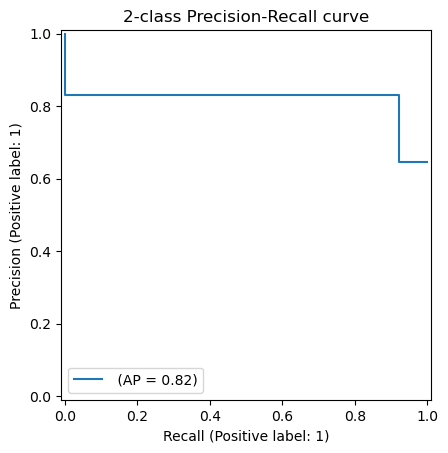

In [100]:
labels, predictions,loss,acc=valid_hyper(hyper_model,test_loader)
from sklearn.metrics import classification_report
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import PrecisionRecallDisplay
y_pred,y_true=[],[]
for i1,i2 in zip(labels, predictions):
      y_pred.extend(i2)
      y_true.extend(i1)
#report = classification_report(labels, predictions)
report = classification_report(y_true,y_pred,output_dict=True)
macro_avg_precision = report['macro avg']['precision']
macro_avg_recall = report['macro avg']['recall']
macro_avg_f1_score = report['macro avg']['f1-score']
accuracy = report['accuracy']
ap=average_precision_score(y_true,y_pred)
roc_auc=roc_auc_score(y_true,y_pred)


precision, recall, thresholds = precision_recall_curve(y_true,y_pred)
print("roc_auc ",roc_auc)
print("AP ",ap)
print(report)
display = PrecisionRecallDisplay.from_predictions(y_true,y_pred, name="")
_ = display.ax_.set_title("2-class Precision-Recall curve")
#record=[m_n_s,'Arabic','embed','concat','single word',not_found,embedding_dim[iterr],'diacrtitics,strip','ASRD_24Feb_24.csv','958341', t_time,'Randah',macro_avg_precision , macro_avg_recall,macro_avg_f1_score , accuracy,ap ,roc_auc]
#result_csv.append(record)
# Create DataFrame, optionally specifying column names
#df = pd.DataFrame(result_csv) 

# Save to CSV
#df.to_csv('RESULTS_DATA.csv', index=False)


In [118]:

torch.save(hyper_model.state_dict(), 'pattern_exp/detection_model/LEAR5_ASRD_Path_7Mar')
torch.save(hyper_model1.state_dict(), 'pattern_exp/detection_model/LEAR5_ASRD_NooPath_7Mar')

# WITHOUT PATH


In [101]:
report = classification_report(y_true,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.66      0.73     40805
           1       0.83      0.92      0.87     74770

    accuracy                           0.83    115575
   macro avg       0.83      0.79      0.80    115575
weighted avg       0.83      0.83      0.82    115575



In [108]:
class HyperenemyDetection_NO_PATH(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, vocab_size, tagset_size, embeddings_matrix):
        super(HyperenemyDetection_NO_PATH, self).__init__()
        
        # Word embedding layer using pre-trained embedding matrix
        self.word_embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.word_embeddings.weight.data.copy_(torch.from_numpy(embeddings_matrix))
        self.word_embeddings.weight.requires_grad = True
        
        # Hidden layer to combine word embeddings + path embedding (precomputed path)
        self.hidden_layer = nn.Linear(embedding_dim * 2 , hidden_dim)
        self.relu = nn.ReLU()

        # Output layer (for binary classification, e.g., hypernym or not)
        self.output_layer = nn.Linear(hidden_dim, tagset_size)

    def forward(self, word_f1, word_f2):
        # Word embeddings for word1 and word2
        embeds_1 = self.word_embeddings(word_f1)  # (batch_size, embedding_dim)
        embeds_2 = self.word_embeddings(word_f2)  # (batch_size, embedding_dim)
        
        # Combine word embeddings and precomputed path embedding
        combined_embed = torch.cat((embeds_1, embeds_2),dim=2)  # Concatenate along last dimension
        
        # Pass through hidden layer and ReLU activation
        out = self.relu(self.hidden_layer(combined_embed))
        
        # Pass through output layer (logits for classification)
        tag_space = self.output_layer(out)
        
        return tag_space

EMBEDDING_DIM=100
HIDDEN_DIM=150
tagset_size = 2  # Binary classification (hypernym or not)
num_epochs = 100
vocab_size = len(dictionary.token2id)
batch_size = 32  # Batch size
hyper_model1 = HyperenemyDetection_NO_PATH(EMBEDDING_DIM, HIDDEN_DIM, vocab_size, tagset_size,embedding_matrix)
loss_function1 = nn.CrossEntropyLoss()#nn.NLLLoss()
optimizer1 = optim.SGD(hyper_model1.parameters(), lr=0.01)
hyper_model1.to(device)
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score


def train_hyper1(epoch):
        tr_loss, tr_accuracy = 0, 0
        nb_tr_examples, nb_tr_steps = 0, 0
        tr_preds, tr_labels = [], []

        # put model in training mode
        hyper_model.train()
        for idx, batch in enumerate(train_loader):
            #print(idx)
            words_1 = batch['word_1'].to(device, dtype = torch.long)
            words_2 = batch['word_2'].to(device, dtype = torch.long)
            labels = batch['rel_type'].to(device, dtype = torch.long)
            path = batch['path'].to(device)  # Path embeddings
        
            output=hyper_model1(words_1,words_2)
            output=output.to(device)
            labels=labels.squeeze()
            output=output.squeeze()
            loss=loss_function1(output, labels)
            tr_logits=output
            tr_loss += loss.item()
            nb_tr_steps += 1
            nb_tr_examples += labels.size(0)

            labels = labels#.view(-1)#torch.masked_select(flattened_targets, active_accuracy)
            predictions = torch.argmax(tr_logits, axis=1)#torch.round(tr_logits)#tr_logits#.view(-1, lstm_model.tagset_size)#torch.masked_select(flattened_predictions, active_accuracy)
            tr_labels.extend(labels)
            tr_preds.extend(predictions)

            tmp_tr_accuracy = accuracy_score(labels.cpu().detach().numpy(), predictions.detach().cpu().numpy())
            tr_accuracy += tmp_tr_accuracy

            # gradient clipping
            torch.nn.utils.clip_grad_norm_(
                parameters=hyper_model1.parameters(), max_norm=10)

            # backward pass
            optimizer1.zero_grad()
            loss.backward()
            optimizer1.step()

        epoch_loss = tr_loss / nb_tr_steps
        tr_accuracy = tr_accuracy / nb_tr_steps
        print("Traiing loss epoch",epoch ,": ", epoch_loss)
        print("Training accuracy epoch",epoch ,": ",tr_accuracy)
        return epoch_loss, tr_accuracy
def valid_hyper1(hyper_model1,test_loader):
        # put model in evaluation mode
        #model.to(device)
        eval_loss, eval_accuracy = 0, 0
        nb_eval_examples, nb_eval_steps = 0, 0
        eval_preds, eval_labels, eval_ids= [], [],[]

        hyper_model1.eval()

        with torch.no_grad():
            for idx, batch in enumerate(test_loader):

                words_1 = batch['word_1'].to(device, dtype = torch.long)
                words_2 = batch['word_2'].to(device, dtype = torch.long)

                labels = batch['rel_type'].to(device, dtype = torch.long)

                path = batch['path'].to(device)  # Path embeddings
        
                output=hyper_model1(words_1,words_2)

                #print(ids)
                #print(labels)

                output=output.to(device)
                labels=labels.squeeze()
                output=output.squeeze()
                loss=loss_function1(output, labels)
                eval_logits=output
                #loss, eval_logits = model(input_ids=ids, attention_mask=mask, labels=labels)

                eval_loss += loss.item()

                nb_eval_steps += 1
                nb_eval_examples += labels.size(0)




                labels = labels#.view(-1)#torch.masked_select(flattened_targets, active_accuracy)
                predictions = torch.argmax(eval_logits, axis=1)#eval_logits#.view(-1, lstm_model.tagset_size)#torch.masked_select(flattened_predictions, active_accuracy)

                eval_labels.append(labels.tolist())
                #print(ids.tolist())
                eval_preds.append(predictions.tolist())
                #ids=ids.tolist()[0]
                #token=[dictionary[i] for i in ids]
                #eval_ids.append(token)

                tmp_eval_accuracy = accuracy_score(labels.cpu().detach().numpy(), predictions.detach().cpu().numpy())
                eval_accuracy += tmp_eval_accuracy

        #labels = []#[ids_to_labels[i] for i in doc for doc in eval_labels]
        #predictions = []#[ids_to_labels[i] for i in doc for doc in eval_preds]

        eval_loss = eval_loss / nb_eval_steps
        eval_accuracy = eval_accuracy / nb_eval_steps
        print(f"Validation Loss: {eval_loss}")
        print(f"Validation Accuracy: {eval_accuracy}")

        return eval_labels,eval_preds,eval_loss,eval_accuracy#labels, predictions
   

In [109]:
import time
s_time=time.time()
min_loss=100
#optm_loss=100
max_acc=0
for i in range(50):
         train_hyper1(i)
         '''_,_,valid_loss,valid_acc=valid_w2v(lstm_model,valid_loader_w2v)
         if valid_acc>max_acc:
            m_n_c=model_name[iterr]+"_acc"
            #torch.save(lstm_model.state_dict(), m_n_c)#multi_word_detection_acc_grams_300_normlize_19DEC')
            max_acc=valid_acc
         if min_loss>valid_loss:
            m_n_s=model_name[iterr]+"_loss"
            torch.save(lstm_model.state_dict(),m_n_s)#multi_word_detection_loss_grams_300_normlize_19DEC')
            min_loss=valid_loss'''
e_time=time.time()
t_time=(e_time-s_time)/60
print("Total time: "+str(t_time))


Traiing loss epoch 0 :  0.5697353121326185
Training accuracy epoch 0 :  0.6928335343966616
Traiing loss epoch 1 :  0.5390018233380252
Training accuracy epoch 1 :  0.7271387287523855
Traiing loss epoch 2 :  0.5170750982903144
Training accuracy epoch 2 :  0.7415757349523876
Traiing loss epoch 3 :  0.4984519165121429
Training accuracy epoch 3 :  0.7528240539311176
Traiing loss epoch 4 :  0.4819391042885256
Training accuracy epoch 4 :  0.7625823206004213
Traiing loss epoch 5 :  0.4678243890042667
Training accuracy epoch 5 :  0.7713430989132692
Traiing loss epoch 6 :  0.45577216577763424
Training accuracy epoch 6 :  0.7789246902471101
Traiing loss epoch 7 :  0.4454692821502851
Training accuracy epoch 7 :  0.7848910797100733
Traiing loss epoch 8 :  0.43609795692103653
Training accuracy epoch 8 :  0.7911714246160844
Traiing loss epoch 9 :  0.42753414801039763
Training accuracy epoch 9 :  0.7962456985632212
Traiing loss epoch 10 :  0.41944364246723354
Training accuracy epoch 10 :  0.8011398189

Validation Loss: 0.3490511242584929
Validation Accuracy: 0.8422032235543359
roc_auc  0.8329584536310404
AP  0.8558672952248059
{'0': {'precision': 0.7633562842805461, 'recall': 0.801519421639505, 'f1-score': 0.7819725044829647, 'support': 40805.0}, '1': {'precision': 0.8886429258902792, 'recall': 0.8643974856225759, 'f1-score': 0.8763525423728814, 'support': 74770.0}, 'accuracy': 0.8421977071165909, 'macro avg': {'precision': 0.8259996050854126, 'recall': 0.8329584536310404, 'f1-score': 0.8291625234279231, 'support': 115575.0}, 'weighted avg': {'precision': 0.8444091260989302, 'recall': 0.8421977071165909, 'f1-score': 0.8430306522919985, 'support': 115575.0}}


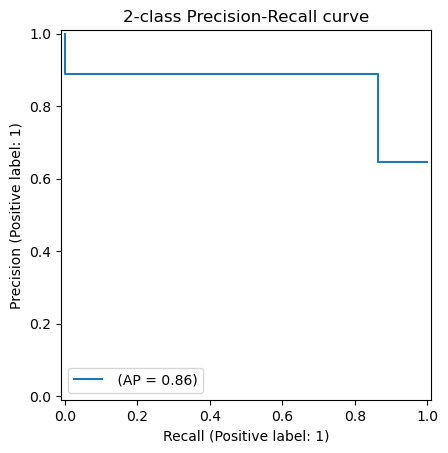

In [110]:
labels, predictions,loss,acc=valid_hyper1(hyper_model1,test_loader)
from sklearn.metrics import classification_report
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import PrecisionRecallDisplay
y_pred,y_true=[],[]
for i1,i2 in zip(labels, predictions):
      y_pred.extend(i2)
      y_true.extend(i1)
#report = classification_report(labels, predictions)
report = classification_report(y_true,y_pred,output_dict=True)
macro_avg_precision = report['macro avg']['precision']
macro_avg_recall = report['macro avg']['recall']
macro_avg_f1_score = report['macro avg']['f1-score']
accuracy = report['accuracy']
ap=average_precision_score(y_true,y_pred)
roc_auc=roc_auc_score(y_true,y_pred)


precision, recall, thresholds = precision_recall_curve(y_true,y_pred)
print("roc_auc ",roc_auc)
print("AP ",ap)
print(report)
display = PrecisionRecallDisplay.from_predictions(y_true,y_pred, name="")
_ = display.ax_.set_title("2-class Precision-Recall curve")



In [111]:
report = classification_report(y_true,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.76      0.80      0.78     40805
           1       0.89      0.86      0.88     74770

    accuracy                           0.84    115575
   macro avg       0.83      0.83      0.83    115575
weighted avg       0.84      0.84      0.84    115575



# Expermint Automization


## Calculate path embedding for the dataset

In [ ]:
1. Train Prototypical network for each embedding
2. calcuate path embedding before training 
3. Train detection model for each embedding
4. evaluate each model 

In [155]:
import numpy 
from gensim import corpora
import gensim
import numpy as np

import torch
import numpy
import torch
from torch.utils.data import Dataset, DataLoader
from gensim.models.poincare import PoincareModel
#from transformers import BertTokenizerFast, BertConfig, BertForTokenClassification,BertPreTrainedModel, BertModel
import torch.nn as nn
import torch.functional as F
import torch.nn.functional as FF
from sklearn.model_selection import train_test_split
from gensim import corpora
from sklearn.metrics import classification_report
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import accuracy_score   
from sklearn.preprocessing import label_binarize

import numpy 
from gensim import corpora
import gensim
import numpy as np
import torch
import numpy
import torch
from torch.utils.data import Dataset, DataLoader

#from transformers import BertTokenizerFast, BertConfig, BertForTokenClassification,BertPreTrainedModel, BertModel
import torch.nn as nn
import torch.functional as F
from sklearn.model_selection import train_test_split
##########################################################################################################################################
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence


## Models Array Intlization

In [253]:
embed_file_path=[# '/media/randah/0b60ddf9-4b0c-4b37-afaf-93898a41f63a/gLEN/GLEN_embeddings_27Sep.npy',
                 #'Half_Models/100/vectors100d_half.txt',
                 #'Half_Models/100/LEAR_ASRD_5iter_half_glove100d.txt',
                 #'Half_Models/100/LEAR_ASRD_20iter_half_glove100d.txt',
                 #'Half_Models/100/LEAR_ASRD_100iter_half_glove100d.txt',
                 #'Poincare_embedding_Kiela2017',
                 '/home/randah/PycharmProjects/models/glove/geometric_emb/glove_ep50_size100_lr0.01_vocab2050641_poincare_OPTradagrad_COOCCFUNClog_DISTFUNCcosh-dist-sq_bias_export.txt',
                 '/home/randah/PycharmProjects/models/glove/geometric_emb/glove_ep50_size100_lr0.05_vocab539642_mix-poincare_OPTmixradagrad_COOCCFUNClog_DISTFUNCdist-sq_NUMEMBS50_E25.txt']
w_embedding_dim=[100,100]#,100,100,100,100,100]
                 
path_embedding_dim=[200,200,]#200,200,200,200,200]

detection_model_name=[#'pattern_exp/detection_model/GLEN_detection_path_ASRD_no_duplicate_7Mar',
            #'pattern_exp/detection_model/GloVe_detection_path_ASRD_no_duplicate_7Mar',
            #'pattern_exp/detection_model/LEAR5_detection_path_ASRD_no_duplicate_7Mar',
            #'pattern_exp/detection_model/LEAR20_detection_path_ASRD_no_duplicate_7Mar',
            #'pattern_exp/detection_model/Lear100_detection_path_ASRD_no_duplicate_7Mar',
            #'pattern_exp/detection_model/poincare_detection_path_ASRD_no_duplicate_7Mar',
            'pattern_exp/detection_model/poincare_glove_detection_path_ASRD_no_duplicate_7Mar',
            'pattern_exp/detection_model/poincare_glove_mix_detection_path_ASRD_no_duplicate_7Mar']
detection_model_name_no_path=[#'pattern_exp/detection_model/GLEN_detection_no_path_ASRD_no_duplicate_7Mar',
            #'pattern_exp/detection_model/GloVe_detection_no_path_ASRD_no_duplicate_7Mar',
            #'pattern_exp/detection_model/LEAR5_detection_no_path_ASRD_no_duplicate_7Mar',
            #'pattern_exp/detection_model/LEAR20_detection_no_path_ASRD_no_duplicate_7Mar',
            #'pattern_exp/detection_model/Lear100_detection_no_path_ASRD_no_duplicate_7Mar',
            #'pattern_exp/detection_model/poincare_detection_no_path_ASRD_no_duplicate_7Mar',
            'pattern_exp/detection_model/poincare_glove_detection_no_path_ASRD_no_duplicate_7Mar',
            'pattern_exp/detection_model/poincare_glove_mix_detection_no_path_ASRD_no_duplicate_7Mar']
path_model_name=[#'pattern_exp/path_model/GLEN_path_ASRD_no_duplicate_7Mar',
            #'pattern_exp/path_model/GloVe_path_ASRD_no_duplicate_7Mar',
            #'pattern_exp/path_model/LEAR5_path_ASRD_no_duplicate_7Mar',
            #'pattern_exp/path_model/LEAR20_path_ASRD_no_duplicate_7Mar',
            #'pattern_exp/path_model/Lear100_path_ASRD_no_duplicate_7Mar',
            #'#pattern_exp/path_model/poincare_path_ASRD_no_duplicate_7Mar',
            'pattern_exp/path_model/poincare_glove_path_ASRD_no_duplicate_7Mar',
            'pattern_exp/path_model/poincare_glove_mix_path_ASRD_no_duplicate_7Mar']

graph_name=[#"GLEN","Glove", "LEAR5","LEAR20","LEAR100",
            #"poincare",
            "poincare glove","poincare glove mix"]
result_csv=[]

In [252]:
print()

## Models and dataset defenitions 

### Embedding

In [226]:
def load_lear_model(lear_file_path):
        """Loads GloVe embeddings from a text file."""
        word_to_index = {}
        embeddings = []
        with open(lear_file_path, 'r', encoding='utf-8') as f:
            for index, line in enumerate(f):
                values = line.split()
                word = values[0]
                coefs = np.asarray(values[2], dtype='float32')
                word_to_index[word] = index
                embeddings.append(coefs)
        return word_to_index, embeddings

from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
def load_glen_embeddings(npy_file_path):
    """Loads modified GloVe embeddings from a NumPy file."""
    embeddings = np.load(npy_file_path)
    word_to_index = load_glove_vocab("/media/randah/0b60ddf9-4b0c-4b37-afaf-93898a41f63a/Dataset/Half_Models/100/vectors100d_half.txt")#e original 'vocab' dictionary

    return word_to_index, embeddings
def load_glove_vocab(file_path):
   
    word_to_index = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for index, line in enumerate(f):
            values = line.split()
            word = values[0]
        
            word_to_index[word] = index
            
    return word_to_index

### Path

In [227]:

# Function to compute prototypes (mean dependency path embeddings) per relation.
def compute_prototypes(data):
    proto_accumulator = {}
    counts = {}
    for idd,item in data.iterrows():
        #print(item)
        dp_arr = np.array(item['embedding'], dtype=np.float32)
        relation=item['relation']
        if relation in proto_accumulator:
            proto_accumulator[relation] += dp_arr
            counts[relation] += 1
        else:
            proto_accumulator[relation] = dp_arr
            counts[relation] = 1
    prototype_dict = {}
    for relation in proto_accumulator:
        prototype_dict[relation] = (proto_accumulator[relation] / counts[relation]).tolist()
    return prototype_dict

# Define a PyTorch Dataset that now processes separate word embeddings.
class DepPathDataset(Dataset):
    def __init__(self, data, prototype_dict):
        """
        data: list of tuples (word1_emb, word2_emb, dp_emb, relation_label)
        prototype_dict: dictionary mapping relation labels to computed prototype vectors
        """
        self.data = data
        self.prototype_dict = prototype_dict

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        word1_emb = self.data['word1_embedding'].iloc[idx]
        word2_emb = self.data['word2_embedding'].iloc[idx]
        dp_emb = self.data['embedding'].iloc[idx]
        #print(self.data['relation'][idx])
        relation = self.data['relation'].iloc[idx]
        # Convert the embeddings to torch tensors
        word1_tensor = torch.tensor(word1_emb, dtype=torch.float)
        word2_tensor = torch.tensor(word2_emb, dtype=torch.float)
        dp_tensor = torch.tensor(dp_emb, dtype=torch.float)
        # Concatenate the two word embeddings (you could also process them individually)
        wp_tensor = torch.cat((word1_tensor, word2_tensor), dim=0)  # Dimension: 600
        # Retrieve the computed prototype for the relation label
        proto_tensor = torch.tensor(self.prototype_dict[relation], dtype=torch.float)
        return wp_tensor, dp_tensor, proto_tensor, relation

# Define a model that maps the concatenated word pair embedding to a residual.
# The final predicted dependency path embedding is the sum of this residual and the prototype.
class ProtoDepPathPredictor(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim=128):
        """
        input_dim: Dimension of concatenated word embeddings (e.g., 600)
        output_dim: Dimension of the dependency path embedding (e.g., 300)
        hidden_dim: Size of the hidden layer
        """
        super(ProtoDepPathPredictor, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)
   
    def forward(self, wp_embedding, prototype):
        # Predict a residual from the concatenated word pair embedding.
        residual = self.fc2(self.relu(self.fc1(wp_embedding)))
        # The final prediction is the sum of the prototype and the residual.
        pred = prototype + residual
        return pred
def predict_dep_path_closest_batch(model,embedding,prototype_dict):
    """
    For a batch of word pairs (with embeddings), this function computes a predicted
    dependency path embedding for every candidate relation (using its prototype),
    then selects for each sample the relation whose predicted embedding is closest 
    (via cosine similarity) to its candidate prototype.

    Returns:
      best_relations: a list (length=batch_size) of candidate relations with the highest cosine similarity.
      best_preds: a NumPy array of predicted dependency path embeddings for the best relations (shape: [batch_size, emb_dim]).
      similarities: a dictionary mapping each candidate relation to its cosine similarity scores 
                    (as a NumPy array, shape: [batch_size]).
    """
    model.eval()
    batch_size = embedding.size(0)
    predictions = {}    # Will hold predicted embeddings for each relation (shape: [batch_size, emb_dim])
    similarities = {}   # Will hold cosine similarity scores for each relation (shape: [batch_size])
    
    with torch.no_grad():
        # For each candidate relation, compute predicted embeddings and cosine similarities for the batch.
        for relation, proto in prototype_dict.items():
            # Create a prototype tensor and repeat it for the entire batch.
            prototype_tensor = torch.tensor(proto, dtype=torch.float).unsqueeze(0).repeat(batch_size, 1)
            # Get the predicted dependency path embeddings for the whole batch.
            pred_embedding = model(embedding, prototype_tensor)  # shape: (batch_size, emb_dim)
            predictions[relation] = pred_embedding
            
            # Compute cosine similarity along the embedding dimension for each sample.
            cos_sim = FF.cosine_similarity(pred_embedding, prototype_tensor, dim=1)  # shape: (batch_size,)
            similarities[relation] = cos_sim

        # Convert the dictionary of similarities into a single tensor for easier processing.
        # The resulting tensor will have shape: (batch_size, num_relations)
        relation_names = list(prototype_dict.keys())
        sim_stack = torch.stack([similarities[rel] for rel in relation_names], dim=1)
        
        # For each sample, find the index of the candidate relation with the highest cosine similarity.
        best_indices = sim_stack.argmax(dim=1)  # shape: (batch_size,)
        
        # Map indices back to relation names.
        best_relations = [relation_names[idx] for idx in best_indices.tolist()]
        
        # Retrieve the best predicted embedding for each sample.
        best_preds = torch.stack(
            [predictions[relation_names[idx]][i] for i, idx in enumerate(best_indices.tolist())],
            dim=0
        )
    
    # Return best relations, best predictions (as a NumPy array), and the similarities for each candidate.
    return best_relations, best_preds.numpy(), {rel: similarities[rel].numpy() for rel in relation_names}

def train_test_path(epoch,model,dataloader,dataloader_test,prototype_dict):
    # Training loop.
    print("####### Training Path #######")
    num_epochs = epoch
    for epoch in range(num_epochs):
        epoch_loss = 0.0
        model.train()
        for wp_emb, dp_emb, prototype, relation in dataloader:
            optimizer.zero_grad()
            # Forward pass: predict dependency path embedding.
            pred = model(wp_emb, prototype)
            # Compute MSE loss between predicted and actual dependency path embedding.
            loss = criterion(pred, dp_emb)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss/len(dataloader):.4f}")
    model.eval()
    test_loss = 0.0
    correct = 0
    total_samples = 0
    correct_count = 0
    total_samples_rel = 0

    with torch.no_grad():
        for wp_emb, dp_emb, prototype, relation in dataloader_test:
            '''pred = model(wp_emb, prototype)
            loss = criterion(pred, dp_emb)
            test_loss += loss.item() * batch_size
            '''
            batch_size = wp_emb.size(0)
            total_samples += batch_size

            best_relations, pred, _ = predict_dep_path_closest_batch(model,wp_emb,prototype_dict)

            # Compare each predicted relation with the true relation.
            # This assumes that true_rel is an iterable of true labels (one per sample).
            for pre, true in zip(best_relations, relation):
                if pre == true:
                    correct_count += 1
            pred = torch.from_numpy(pred)
            # Compute cosine similarity along the feature dimension (dim=1)
            cos_sim = FF.cosine_similarity(pred, dp_emb, dim=1)
            # Count predictions with cosine similarity above the threshold
            correct += torch.sum(cos_sim > cosine_threshold).item()

    test_loss /= total_samples
    accuracy = correct / total_samples

    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy (cosine similarity > {cosine_threshold}): {accuracy:.4f}")
    # Compute accuracy percentage
    accuracy_percentage = (correct_count / total_samples) * 100
    print(f"Accuracy: {accuracy_percentage:.2f}%")

    # Optionally, you can also print the average cosine similarity:
    with torch.no_grad():
        cos_total = 0.0
        for wp_emb, dp_emb, prototype, relation in dataloader_test:
            _,pred,_=predict_dep_path_closest_batch(model,wp_emb,prototype_dict)
            pred = torch.from_numpy(pred)
            cos_sim = FF.cosine_similarity(pred, dp_emb, dim=1)
            cos_total += torch.sum(cos_sim).item()
        avg_cosine = cos_total / total_samples
        print(f"Average Cosine Similarity: {avg_cosine:.4f}")
    return accuracy,avg_cosine,accuracy_percentage,test_loss


### Detection Model with path

In [237]:
class HyperenemyDetection(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, vocab_size, tagset_size, embeddings_matrix, path_emb_dim):
        super(HyperenemyDetection, self).__init__()
        
        # Word embedding layer using pre-trained embedding matrix
        self.word_embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.word_embeddings.weight.data.copy_(torch.from_numpy(embeddings_matrix))
        self.word_embeddings.weight.requires_grad = True
        
        # Hidden layer to combine word embeddings + path embedding (precomputed path)
        self.hidden_layer = nn.Linear(embedding_dim * 2 + path_emb_dim, hidden_dim)
        self.relu = nn.ReLU()

        # Output layer (for binary classification, e.g., hypernym or not)
        self.output_layer = nn.Linear(hidden_dim, tagset_size)

    def forward(self, word_f1, word_f2, path_embed):
        # Word embeddings for word1 and word2
        embeds_1 = self.word_embeddings(word_f1)  # (batch_size, embedding_dim)
        embeds_2 = self.word_embeddings(word_f2)  # (batch_size, embedding_dim)
        
        # Combine word embeddings and precomputed path embedding
        
        #print(embeds_1.size())
        #print(embeds_2.size())
        #print(path_embed.size())
        combined_embed = torch.cat((embeds_1, embeds_2, path_embed), dim=2)  # Concatenate along last dimension
        
        # Pass through hidden layer and ReLU activation
        out = self.relu(self.hidden_layer(combined_embed))
        
        # Pass through output layer (logits for classification)
        tag_space = self.output_layer(out)
        
        return tag_space
from torch.utils.data import Dataset, DataLoader

class dataset_hyper(Dataset):
    def __init__(self, dataframe, dictionary):
        self.len = len(dataframe)
        self.data = dataframe
        self.dictionary = dictionary

    def __getitem__(self, index):
        # Retrieve word embeddings for word1 and word2
        word_f1 = self.data['word1'].iloc[index].strip()
        word_f2 = self.data['word2'].iloc[index].strip()
        rel_type = self.data['relation'].iloc[index]

        # Convert words to their corresponding indices
        word_f1_idx = [self.dictionary.token2id[word_f1]]
        word_f2_idx = [self.dictionary.token2id[word_f2]]
        #print(word_f1, word_f2,rel_type)
        # Retrieve or predict path embedding
        path_embedding = self.data['path_embedding'].iloc[index]
        if path_embedding is not None:
            # If a path embedding object exists, use it
            path_embed = path_embedding

        else:
            # If path does not exist, predict the path using the `predict_missing_path` function
            #path_embed = predict_dep_path(get_embedding(word_f1), get_embedding(word_f2),rel_type)
            #path_idx = [self.dictionary.token2id[predicted_path]]
            _,path_embed,_ = predict_dep_path_closest_batch(get_embedding(word_f1), get_embedding(word_f2))
        #print(path_embed)

        # Convert the relation type to label (0 or 1)
        if rel_type == 'hypernym':
            rel_type = 1
        else:
            rel_type = 0

        # Create the item with word1, word2, path, and relation type
        item = {
            'word_1': torch.as_tensor(word_f1_idx, dtype=torch.long),
            'word_2': torch.as_tensor(word_f2_idx, dtype=torch.long),
            'path': torch.as_tensor(path_embed, dtype=torch.float),  # Path index
            'rel_type': torch.as_tensor(int(rel_type), dtype=torch.long)
        }

        return item

    def __len__(self):
        return self.len

def train_hyper(epoch,hyper_model,train_loader,loss_function,optimizer):
        tr_loss, tr_accuracy = 0, 0
        nb_tr_examples, nb_tr_steps = 0, 0
        tr_preds, tr_labels = [], []

        # put model in training mode
        hyper_model.train()
        for idx, batch in enumerate(train_loader):
            #print(idx)
            words_1 = batch['word_1'].to(device, dtype = torch.long)
            words_2 = batch['word_2'].to(device, dtype = torch.long)
            labels = batch['rel_type'].to(device, dtype = torch.long)
            path = batch['path'].to(device)  # Path embeddings
        
            output=hyper_model(words_1,words_2,path)
            output=output.to(device)
            labels=labels.squeeze()
            output=output.squeeze()
            loss=loss_function(output, labels)
            tr_logits=output
            tr_loss += loss.item()
            nb_tr_steps += 1
            nb_tr_examples += labels.size(0)

            labels = labels#.view(-1)#torch.masked_select(flattened_targets, active_accuracy)
            predictions = torch.argmax(tr_logits, axis=1)#torch.round(tr_logits)#tr_logits#.view(-1, lstm_model.tagset_size)#torch.masked_select(flattened_predictions, active_accuracy)
            tr_labels.extend(labels)
            tr_preds.extend(predictions)

            tmp_tr_accuracy = accuracy_score(labels.cpu().detach().numpy(), predictions.detach().cpu().numpy())
            tr_accuracy += tmp_tr_accuracy

            # gradient clipping
            torch.nn.utils.clip_grad_norm_(
                parameters=hyper_model.parameters(), max_norm=10)

            # backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        epoch_loss = tr_loss / nb_tr_steps
        tr_accuracy = tr_accuracy / nb_tr_steps
        if epoch==48:
            print("Traiing loss epoch",epoch ,": ", epoch_loss)
            print("Training accuracy epoch",epoch ,": ",tr_accuracy)
        return epoch_loss, tr_accuracy
def valid_hyper(hyper_model,test_loader,loss_function,optimizer):
        # put model in evaluation mode
        #model.to(device)
        eval_loss, eval_accuracy = 0, 0
        nb_eval_examples, nb_eval_steps = 0, 0
        eval_preds, eval_labels, eval_ids= [], [],[]

        hyper_model.eval()

        with torch.no_grad():
            for idx, batch in enumerate(test_loader):

                words_1 = batch['word_1'].to(device, dtype = torch.long)
                words_2 = batch['word_2'].to(device, dtype = torch.long)

                labels = batch['rel_type'].to(device, dtype = torch.long)

                path = batch['path'].to(device)  # Path embeddings
        
                output=hyper_model(words_1,words_2,path)

                #print(ids)
                #print(labels)

                output=output.to(device)
                labels=labels.squeeze()
                output=output.squeeze()
                loss=loss_function(output, labels)
                eval_logits=output
                #loss, eval_logits = model(input_ids=ids, attention_mask=mask, labels=labels)

                eval_loss += loss.item()

                nb_eval_steps += 1
                nb_eval_examples += labels.size(0)




                labels = labels#.view(-1)#torch.masked_select(flattened_targets, active_accuracy)
                predictions = torch.argmax(eval_logits, axis=1)#eval_logits#.view(-1, lstm_model.tagset_size)#torch.masked_select(flattened_predictions, active_accuracy)

                eval_labels.append(labels.tolist())
                #print(ids.tolist())
                eval_preds.append(predictions.tolist())
                #ids=ids.tolist()[0]
                #token=[dictionary[i] for i in ids]
                #eval_ids.append(token)

                tmp_eval_accuracy = accuracy_score(labels.cpu().detach().numpy(), predictions.detach().cpu().numpy())
                eval_accuracy += tmp_eval_accuracy

        #labels = []#[ids_to_labels[i] for i in doc for doc in eval_labels]
        #predictions = []#[ids_to_labels[i] for i in doc for doc in eval_preds]

        eval_loss = eval_loss / nb_eval_steps
        eval_accuracy = eval_accuracy / nb_eval_steps
        print(f"Validation Loss: {eval_loss}")
        print(f"Validation Accuracy: {eval_accuracy}")

        return eval_labels,eval_preds,eval_loss,eval_accuracy#labels, predictions

### Detection Model no path

In [250]:
class HyperenemyDetection_NO_PATH(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, vocab_size, tagset_size, embeddings_matrix):
        super(HyperenemyDetection_NO_PATH, self).__init__()
        
        # Word embedding layer using pre-trained embedding matrix
        self.word_embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.word_embeddings.weight.data.copy_(torch.from_numpy(embeddings_matrix))
        self.word_embeddings.weight.requires_grad = True
        
        # Hidden layer to combine word embeddings + path embedding (precomputed path)
        self.hidden_layer = nn.Linear(embedding_dim * 2 , hidden_dim)
        self.relu = nn.ReLU()

        # Output layer (for binary classification, e.g., hypernym or not)
        self.output_layer = nn.Linear(hidden_dim, tagset_size)

    def forward(self, word_f1, word_f2):
        # Word embeddings for word1 and word2
        embeds_1 = self.word_embeddings(word_f1)  # (batch_size, embedding_dim)
        embeds_2 = self.word_embeddings(word_f2)  # (batch_size, embedding_dim)
        
        # Combine word embeddings and precomputed path embedding
        combined_embed = torch.cat((embeds_1, embeds_2),dim=2)  # Concatenate along last dimension
        
        # Pass through hidden layer and ReLU activation
        out = self.relu(self.hidden_layer(combined_embed))
        
        # Pass through output layer (logits for classification)
        tag_space = self.output_layer(out)
        
        return tag_space


def train_hyper1(epoch,hyper_model1,train_loader,loss_function1,optimizer1):
        tr_loss, tr_accuracy = 0, 0
        nb_tr_examples, nb_tr_steps = 0, 0
        tr_preds, tr_labels = [], []

        # put model in training mode
        hyper_model1.train()
        for idx, batch in enumerate(train_loader):
            #print(idx)
            words_1 = batch['word_1'].to(device, dtype = torch.long)
            words_2 = batch['word_2'].to(device, dtype = torch.long)
            labels = batch['rel_type'].to(device, dtype = torch.long)
            path = batch['path'].to(device)  # Path embeddings
        
            output=hyper_model1(words_1,words_2)
            output=output.to(device)
            labels=labels.squeeze()
            output=output.squeeze()
            loss=loss_function1(output, labels)
            tr_logits=output
            tr_loss += loss.item()
            nb_tr_steps += 1
            nb_tr_examples += labels.size(0)

            labels = labels#.view(-1)#torch.masked_select(flattened_targets, active_accuracy)
            predictions = torch.argmax(tr_logits, axis=1)#torch.round(tr_logits)#tr_logits#.view(-1, lstm_model.tagset_size)#torch.masked_select(flattened_predictions, active_accuracy)
            tr_labels.extend(labels)
            tr_preds.extend(predictions)

            tmp_tr_accuracy = accuracy_score(labels.cpu().detach().numpy(), predictions.detach().cpu().numpy())
            tr_accuracy += tmp_tr_accuracy

            # gradient clipping
            torch.nn.utils.clip_grad_norm_(
                parameters=hyper_model1.parameters(), max_norm=10)

            # backward pass
            optimizer1.zero_grad()
            loss.backward()
            optimizer1.step()

        epoch_loss = tr_loss / nb_tr_steps
        tr_accuracy = tr_accuracy / nb_tr_steps
        if epoch==48:
            print("Traiing loss epoch",epoch ,": ", epoch_loss)
            print("Training accuracy epoch",epoch ,": ",tr_accuracy)
        return epoch_loss, tr_accuracy
def valid_hyper1(hyper_model1,test_loader,loss_function1,optimizer1):
        # put model in evaluation mode
        #model.to(device)
        eval_loss, eval_accuracy = 0, 0
        nb_eval_examples, nb_eval_steps = 0, 0
        eval_preds, eval_labels, eval_ids= [], [],[]

        hyper_model1.eval()

        with torch.no_grad():
            for idx, batch in enumerate(test_loader):

                words_1 = batch['word_1'].to(device, dtype = torch.long)
                words_2 = batch['word_2'].to(device, dtype = torch.long)

                labels = batch['rel_type'].to(device, dtype = torch.long)

                path = batch['path'].to(device)  # Path embeddings
        
                output=hyper_model1(words_1,words_2)

                #print(ids)
                #print(labels)

                output=output.to(device)
                labels=labels.squeeze()
                output=output.squeeze()
                loss=loss_function1(output, labels)
                eval_logits=output
                #loss, eval_logits = model(input_ids=ids, attention_mask=mask, labels=labels)

                eval_loss += loss.item()

                nb_eval_steps += 1
                nb_eval_examples += labels.size(0)




                labels = labels#.view(-1)#torch.masked_select(flattened_targets, active_accuracy)
                predictions = torch.argmax(eval_logits, axis=1)#eval_logits#.view(-1, lstm_model.tagset_size)#torch.masked_select(flattened_predictions, active_accuracy)

                eval_labels.append(labels.tolist())
                #print(ids.tolist())
                eval_preds.append(predictions.tolist())
                #ids=ids.tolist()[0]
                #token=[dictionary[i] for i in ids]
                #eval_ids.append(token)

                tmp_eval_accuracy = accuracy_score(labels.cpu().detach().numpy(), predictions.detach().cpu().numpy())
                eval_accuracy += tmp_eval_accuracy

        #labels = []#[ids_to_labels[i] for i in doc for doc in eval_labels]
        #predictions = []#[ids_to_labels[i] for i in doc for doc in eval_preds]

        eval_loss = eval_loss / nb_eval_steps
        eval_accuracy = eval_accuracy / nb_eval_steps
        print(f"Validation Loss: {eval_loss}")
        print(f"Validation Accuracy: {eval_accuracy}")

        return eval_labels,eval_preds,eval_loss,eval_accuracy#labels, predictions

## TRaining and testing loop

In [182]:
temp_w1=[w.strip() for w in datapath['word1'].tolist()]
temp_w2=[w.strip() for w in datapath['word2'].tolist()]
temp_w3=[w.strip() for w in all_paths['word1'].tolist()]
temp_w4=[w.strip() for w in all_paths['word2'].tolist()]
mix=[temp_w1,temp_w2,temp_w3,temp_w4]

dictionary = corpora.Dictionary(mix)
vocab_size= len(dictionary)

In [183]:
vocab_size

14448

In [144]:
all_paths['relation'].value_counts()

antonym     74
holonym     46
hypernym    37
meronym     36
attrib      21
synonym      4
Name: relation, dtype: int64

In [224]:
len(datapath)

289956

In [171]:
word_to_index[item['word1']]

99116

In [254]:

for itter, embed_file in enumerate(embed_file_path):
        # Load the specific embedding
        print("**********************************************************************")
        print(embed_file)
        print("**********************************************************************")
        vocab_size= len(dictionary)
        if embed_file=='/media/randah/0b60ddf9-4b0c-4b37-afaf-93898a41f63a/gLEN/GLEN_embeddings_27Sep.npy':
            embedding_dim=100
            word_to_index, embeddings = load_glen_embeddings(embed_file)#load_lear_model(embed_file)
            embeddings_matrix = numpy.random.rand(vocab_size, embedding_dim)  # Initialize with random values
            not_found = 0
            for word, j in dictionary.token2id.items():
                if word in word_to_index:
                    embeddings_matrix[j] = embeddings[word_to_index[word]]
                else:
                    #print(word)
                    not_found += 1
            print("Not found words:", not_found, "out of", vocab_size)
        elif embed_file=="Poincare_embedding_Kiela2017":
            mo = PoincareModel.load(embed_file)
            embeddings=mo.kv.vectors
            word_to_index=mo.kv.key_to_index
            embedding_dim=50
            embeddings_matrix = numpy.random.rand(vocab_size, embedding_dim)  # Initialize with random values
            not_found = 0
            for word, j in dictionary.token2id.items():
                if word in word_to_index:
                    embeddings_matrix[j] = mo.kv.get_vector(word.strip())
                else:
                    #print(word)
                    not_found += 1
            print("Not found words:", not_found, "out of", vocab_size)
        else:
            embedding_dim=100
            word_to_index, embeddings = load_lear_model(embed_file)
            embeddings_matrix = numpy.random.rand(vocab_size, embedding_dim)  # Initialize with random values
            not_found = 0
            for word, j in dictionary.token2id.items():
                if word in word_to_index:
                    embeddings_matrix[j] = embeddings[word_to_index[word]]
                else:
                    #print(word)
                    not_found += 1
            print("Not found words:", not_found, "out of", vocab_size)
        
        #######################################################################################
        #path embedding predector
        #####################################################################################################################################
        print("----------------------------------------------------------------------------")
        print("1.path embedding predector")
        print("----------------------------------------------------------------------------")
        # Dimensions: input_dim = 600 (concatenated), output_dim = 300 (dependency path embedding)
        input_dim = w_embedding_dim[itter]*2
        output_dim = path_embedding_dim[itter]

        # Instantiate the model, loss function, and optimizer.
        path_model = ProtoDepPathPredictor(input_dim, output_dim, hidden_dim=128)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(path_model.parameters(), lr=1e-3)
        train_dataframe, test_dataframe = train_test_split(all_paths, test_size=0.2, random_state=0)
        # Create DataLoader for batching.
        dataset = DepPathDataset(train_dataframe, prototype_dict)
        dataloader = DataLoader(dataset, batch_size=16, shuffle=True)
        dataset_test = DepPathDataset(test_dataframe, prototype_dict)
        dataloader_test = DataLoader(dataset_test, batch_size=16, shuffle=False)
        prototype_dict = compute_prototypes(train_dataframe)
        #Train a path mapper 
        accuracy_cosine,avg_cosine,accuracy_relation,test_path_loss=train_test_path(100,path_model,dataloader,dataloader_test,prototype_dict)
        torch.save(path_model.state_dict(),path_model_name[itter])
        ### predect path embedding for all item in the dataset
        # Splitting the dataset (e.g., 80% train, 20% test)
        train_dataframe, test_dataframe = train_test_split(datapath, test_size=0.2)
        train_dataframe, valid_dataframe = train_test_split(train_dataframe, test_size=0.25, random_state=0)
        for idx, item in train_dataframe.iterrows():
            emb1 = torch.from_numpy(embedding_matrix[dictionary.token2id[item['word1']]]).unsqueeze(0)
            emb2 = torch.from_numpy(embedding_matrix[dictionary.token2id[item['word2']]]).unsqueeze(0)
            wp_concat = torch.cat((emb1, emb2), dim=1).float()  
            _,p,_=predict_dep_path_closest_batch(path_model,wp_concat,prototype_dict)
            #print(p[0])
            train_dataframe.at[idx, 'path_embedding']=p
        for idx, item in test_dataframe.iterrows():
            emb1 = torch.from_numpy(embedding_matrix[dictionary.token2id[item['word1']]]).unsqueeze(0)
            emb2 = torch.from_numpy(embedding_matrix[dictionary.token2id[item['word2']]]).unsqueeze(0)
            wp_concat = torch.cat((emb1, emb2), dim=1).float()    # Now shape is [1, 2*embedding_size]
            _,test_dataframe.at[idx, 'path_embedding'],_ =predict_dep_path_closest_batch(path_model,wp_concat,prototype_dict)
        for idx, item in valid_dataframe.iterrows():
            emb1 = torch.from_numpy(embedding_matrix[dictionary.token2id[item['word1']]]).unsqueeze(0)
            emb2 = torch.from_numpy(embedding_matrix[dictionary.token2id[item['word2']]]).unsqueeze(0)
            wp_concat = torch.cat((emb1, emb2), dim=1).float()    # Now shape is [1, 2*embedding_size]
            _,valid_dataframe.at[idx, 'path_embedding'],_ =predict_dep_path_closest_batch(path_model,wp_concat,prototype_dict)
        
        ######################################################################
        #              Detection Model with path
        ####################################################################
        print("----------------------------------------------------------------------------")
        print("2.Detection Model with path")
        print("----------------------------------------------------------------------------")
        EMBEDDING_DIM=w_embedding_dim[itter]
        HIDDEN_DIM=150
        PATH_EMBEDDING_DIM =  path_embedding_dim[itter] # Path embedding size
        tagset_size = 2  # Binary classification (hypernym or not)
        num_epochs = 100
        batch_size = 32  # Batch size
        hyper_model_path = HyperenemyDetection(EMBEDDING_DIM, HIDDEN_DIM, vocab_size, tagset_size,embeddings_matrix,PATH_EMBEDDING_DIM)
        loss_function = nn.CrossEntropyLoss()#nn.NLLLoss()
        optimizer = optim.SGD(hyper_model_path.parameters(), lr=0.01)
        hyper_model_path.to(device)
        # Splitting the dataset (e.g., 80% train, 20% test)
        #train_dataframe, test_dataframe = train_test_split(datapath, test_size=0.2)
        #train_dataframe, valid_dataframe = train_test_split(train_dataframe, test_size=0.25, random_state=0)
        # Create train and test datasets using the dataset_hyper class
        train_dataset = dataset_hyper(train_dataframe, dictionary)
        test_dataset = dataset_hyper(test_dataframe, dictionary)
        valid_dataset = dataset_hyper(valid_dataframe, dictionary)

        # Create DataLoaders for train and test sets
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
        valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=True)
        import time
        s_time=time.time()
        min_loss=100
        #optm_loss=100
        max_acc=0
        for i in range(50):
             train_hyper(i,hyper_model_path,train_loader,loss_function,optimizer)
             _,_,valid_loss,valid_acc=valid_hyper(hyper_model_path,valid_loader,loss_function,optimizer)
             if min_loss>valid_loss:
                torch.save(hyper_model_path.state_dict(),detection_model_name[itter])#multi_word_detection_loss_grams_300_normlize_19DEC')
                min_loss=valid_loss
        e_time=time.time()
        t_time_detection_path=(e_time-s_time)/60
        print("Total time: "+str(t_time_detection_path))
        ################################################################################################################################
        hyper_model_path.load_state_dict(torch.load(detection_model_name[itter]))#,map_location=torch.device('cpu')))
        labels, predictions,loss,acc=valid_hyper(hyper_model_path,test_loader,loss_function,optimizer)
        from sklearn.preprocessing import MultiLabelBinarizer
        y_pred,y_true=[],[]
        for i1,i2 in zip(labels, predictions):
          y_pred.extend(i2)
          y_true.extend(i1)
        report_path = classification_report(y_true,y_pred,output_dict=True)
        macro_avg_precision = report_path['macro avg']['precision']
        macro_avg_recall = report_path['macro avg']['recall']
        macro_avg_f1_score = report_path['macro avg']['f1-score']
        accuracy = report_path['accuracy']
        AP_path=average_precision_score(y_true,y_pred)
        roc_auc_path=roc_auc_score(y_true,y_pred)
        print("########## Path validation###############")
        print("roc_auc ",roc_auc_path)
        print("AP ",AP_path)
        print("Accuracy",accuracy)
        print("macro_avg_f1:",macro_avg_f1_score)
        ######################################################################
        #              Detection Model with No path
        ####################################################################
        print("----------------------------------------------------------------------------")
        print("2.Detection Model with No path")
        print("----------------------------------------------------------------------------")
  
        hyper_model_no_path = HyperenemyDetection_NO_PATH(EMBEDDING_DIM, HIDDEN_DIM, vocab_size, tagset_size,
                                                          embeddings_matrix)
        loss_function1 = nn.CrossEntropyLoss()#nn.NLLLoss()
        optimizer1 = optim.SGD(hyper_model_no_path.parameters(), lr=0.01)
        hyper_model_no_path.to(device)
    
        import time
        s_time=time.time()
        min_loss=100
        #optm_loss=100
        max_acc=0
        for i in range(50):
             train_hyper1(i,hyper_model_no_path,train_loader,loss_function1,optimizer1)
             _,_,valid_loss,valid_acc=valid_hyper1(hyper_model_no_path,valid_loader,loss_function1,optimizer1)
             if min_loss>valid_loss:
                torch.save(hyper_model_no_path.state_dict(),detection_model_name_no_path[itter])
                min_loss=valid_loss
        e_time=time.time()
        t_time_detection_no_path=(e_time-s_time)/60
        print("Total time: "+str(t_time_detection_no_path))
        ################################################################################################################################
        hyper_model_no_path.load_state_dict(torch.load(detection_model_name_no_path[itter]))#,map_location=torch.device('cpu')))
        labels_no, predictions_no,loss,acc=valid_hyper1(hyper_model_no_path,test_loader,loss_function1,optimizer1)
        from sklearn.preprocessing import MultiLabelBinarizer
        y_pred_no,y_true_no=[],[]
        for i1,i2 in zip(labels_no, predictions_no):
          y_pred_no.extend(i2)
          y_true_no.extend(i1)
        report_no_path = classification_report(y_true_no,y_pred_no,output_dict=True)
        macro_avg_f1_score_no = report_no_path['macro avg']['f1-score']
        AP_no_path=average_precision_score(y_true_no,y_pred_no)
        roc_auc_no_path=roc_auc_score(y_true_no,y_pred_no)
        print("########## No Path validation###############")
        print("roc_auc ",roc_auc_no_path)
        print("AP ",AP_no_path)
        accuracy_no = report_path['accuracy']
        print("acc",accuracy_no)
        print("macro_avg_f1:",macro_avg_f1_score_no)
                                                  
                                                  
        record=[detection_model_name[itter],
                'Arabic',
                embed_file[itter],
                'concat',
                'single word',
                not_found,
                'diacrtitics,strip',
                'ASRD_no_duplicate_with_anto',
                len(datapath),
                t_time_detection_path,
                'Randah',
                report_path['macro avg']['precision'] ,
                report_path['macro avg']['recall'],
                report_path['macro avg']['f1-score'],
                report_path['accuracy'],
                AP_path ,
                roc_auc_path,
                detection_model_name_no_path[itter],
                t_time_detection_no_path,
                report_no_path['macro avg']['precision'] ,
                report_no_path['macro avg']['recall'],
                report_no_path['macro avg']['f1-score'],
                report_no_path['accuracy'],
                AP_no_path ,
                roc_auc_no_path,
                path_model_name[itter],
                accuracy_cosine,
                avg_cosine,
                accuracy_relation,
                test_path_loss]
        result_csv.append(record)
        df_path = pd.DataFrame(result_csv) 
        df_path.to_csv('RESULTS_Missing_path.csv', index=False)

        
    


**********************************************************************
/home/randah/PycharmProjects/models/glove/geometric_emb/glove_ep50_size100_lr0.01_vocab2050641_poincare_OPTradagrad_COOCCFUNClog_DISTFUNCcosh-dist-sq_bias_export.txt
**********************************************************************
Not found words: 1085 out of 14448
----------------------------------------------------------------------------
1.path embedding predector
----------------------------------------------------------------------------
####### Training Path #######
Epoch 1/100, Loss: 0.0646
Epoch 2/100, Loss: 0.0597
Epoch 3/100, Loss: 0.0570
Epoch 4/100, Loss: 0.0545
Epoch 5/100, Loss: 0.0519
Epoch 6/100, Loss: 0.0493
Epoch 7/100, Loss: 0.0469
Epoch 8/100, Loss: 0.0446
Epoch 9/100, Loss: 0.0424
Epoch 10/100, Loss: 0.0408
Epoch 11/100, Loss: 0.0390
Epoch 12/100, Loss: 0.0375
Epoch 13/100, Loss: 0.0362
Epoch 14/100, Loss: 0.0350
Epoch 15/100, Loss: 0.0338
Epoch 16/100, Loss: 0.0329
Epoch 17/100, Loss: 0.0

/tmp/ipykernel_6635/1663741435.py:135: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  hyper_model_path.load_state_dict(torch.load(detection_model_name[itter]))#,map_location=

Validation Loss: 0.4909605271271823
Validation Accuracy: 0.7550675675675675
########## Path validation###############
roc_auc  0.7211864549243248
AP  0.7501222257189066
Accuracy 0.7550179335080701
macro_avg_f1: 0.7281709999478478
----------------------------------------------------------------------------
2.Detection Model with No path
----------------------------------------------------------------------------
Validation Loss: 0.6623338055558055
Validation Accuracy: 0.6192503545819873
Validation Loss: 0.6611100277779711
Validation Accuracy: 0.6212325663856276
Validation Loss: 0.6597334957885532
Validation Accuracy: 0.6212645772594753
Validation Loss: 0.6573970172527542
Validation Accuracy: 0.6216807186194941
Validation Loss: 0.651784260727987
Validation Accuracy: 0.6217053423686077
Validation Loss: 0.6315041963592525
Validation Accuracy: 0.6248005476321803
Validation Loss: 0.5901327505173501
Validation Accuracy: 0.6706721298558033
Validation Loss: 0.559178203985432
Validation Accuracy

/tmp/ipykernel_6635/1663741435.py:182: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  hyper_model_no_path.load_state_dict(torch.load(detection_model_name_no_path[itter]))#,ma

Validation Loss: 0.4861503052517517
Validation Accuracy: 0.754222972972973
########## No Path validation###############
roc_auc  0.7196565034608001
AP  0.7489665810604101
acc 0.7550179335080701
macro_avg_f1: 0.7267617225809461
**********************************************************************
/home/randah/PycharmProjects/models/glove/geometric_emb/glove_ep50_size100_lr0.05_vocab539642_mix-poincare_OPTmixradagrad_COOCCFUNClog_DISTFUNCdist-sq_NUMEMBS50_E25.txt
**********************************************************************
Not found words: 2536 out of 14448
----------------------------------------------------------------------------
1.path embedding predector
----------------------------------------------------------------------------
####### Training Path #######
Epoch 1/100, Loss: 0.0640
Epoch 2/100, Loss: 0.0599
Epoch 3/100, Loss: 0.0574
Epoch 4/100, Loss: 0.0549
Epoch 5/100, Loss: 0.0523
Epoch 6/100, Loss: 0.0499
Epoch 7/100, Loss: 0.0478
Epoch 8/100, Loss: 0.0454
Epoch 9/

/tmp/ipykernel_6635/1663741435.py:135: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  hyper_model_path.load_state_dict(torch.load(detection_model_name[itter]))#,map_location=

Validation Loss: 0.49903083787856023
Validation Accuracy: 0.7469318808604523
########## Path validation###############
roc_auc  0.7193842481947568
AP  0.7450355282274643
Accuracy 0.7469823423920541
macro_avg_f1: 0.7245395715352547
----------------------------------------------------------------------------
2.Detection Model with No path
----------------------------------------------------------------------------
Validation Loss: 0.658787765196523
Validation Accuracy: 0.6226435072098337
Validation Loss: 0.658341651421782
Validation Accuracy: 0.6228626585769443
Validation Loss: 0.6605907744027867
Validation Accuracy: 0.6227223032069972
Validation Loss: 0.657577012858204
Validation Accuracy: 0.6226435072098337
Validation Loss: 0.6573757643996847
Validation Accuracy: 0.6227296903317312
Validation Loss: 0.6563791407449957
Validation Accuracy: 0.623367445433772
Validation Loss: 0.6541610273681027
Validation Accuracy: 0.6236112205499961
Validation Loss: 0.6503440211211129
Validation Accuracy:

/tmp/ipykernel_6635/1663741435.py:182: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  hyper_model_no_path.load_state_dict(torch.load(detection_model_name_no_path[itter]))#,ma

Validation Loss: 0.49621831343375183
Validation Accuracy: 0.7499827633756205
########## No Path validation###############
roc_auc  0.7187094653322323
AP  0.7439467789880948
acc 0.7469823423920541
macro_avg_f1: 0.7250418545042903


In [ ]:
dictionary.token2id[item['word1']]

In [ ]:
train_dataframe

In [247]:
embeddings_matrix.shape

(14448, 100)

In [ ]:
datapath['path_embedding']=None
datapath

# Extra code try

In [ ]:
class WordToPathProjector(nn.Module):
    def __init__(self, word_emb_dim, path_emb_dim, hidden_dim):
        super(WordToPathProjector, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(word_emb_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, path_emb_dim)  # Maps to path space
        )

    def forward(self, word_pair_embedding):
        return self.network(word_pair_embedding)
